193     42773
194     60649
195     83530
196     59877
197     38732
198    101000
199     44469
200     27713
201     38372
202     44821
203     47823
204     59157
205     43332
206     77899
207     67680
208     24395
209     28465
210     24690
211     39352
212     51974
213     37104
214     53977
215     26877
216     37905
217     68945
218     40594
219     68135
220     31635
221     87115
222    185037
223    166309
224    112753
225     96728
226     46769
227     47688
228     64585
229     58662
230     56042
231     29958
232     64810
233     27712
234     23756
Name: volume, dtype: int64


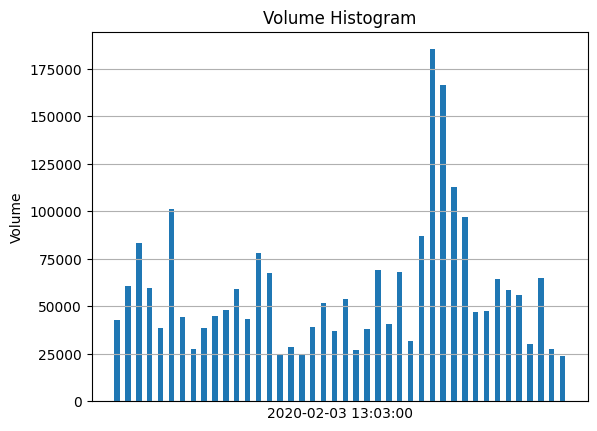

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_volume_histogram(csv_file, target_id):
    # CSV 파일을 읽습니다.
    df = pd.read_csv(csv_file)

    # 주어진 ID를 가진 행을 찾습니다.
    target_row = df[df['id'] == target_id]

    if target_row.empty:
        print("해당 ID를 가진 행을 찾을 수 없습니다.")
        return

    # 주어진 ID의 앞뒤 20개의 행을 선택합니다.
    start_index = max(0, target_row.index[0] - 20)
    end_index = min(len(df), target_row.index[0] + 21)  # +1 을 추가하여 20개의 앞뒤 행을 선택합니다.

    # 선택된 범위의 volume 필드 데이터를 추출합니다.
    volume_data = df.loc[start_index:end_index, 'volume']
    timestamp_data = df.loc[start_index:end_index, 'timestamp']
    print(volume_data)
    # 히스토그램을 그립니다.
    plt.bar(range(len(volume_data)), volume_data, width=0.5, align='center')

    # 주어진 ID에 해당하는 경우에만 해당 timestamp 값을 밑에 표시합니다.
    if target_id in df['id'].values:
        target_index = list(df['id']).index(target_id)
        plt.xlabel(str(df['timestamp'][target_index]))  # 주어진 ID의 timestamp 값을 추가합니다.
    else:
        plt.xlabel('Timestamp')  # 다른 경우에는 각 막대 아래에 있는 timestamp를 표시하지 않습니다.

    plt.title('Volume Histogram')
    plt.ylabel('Volume')
    plt.xticks([])  # x 축의 눈금을 없앱니다.
    plt.grid(True)
    plt.show()

# 사용 예시
csv_file_path = 'SPY.csv'  # CSV 파일 경로를 제공하세요.
target_id = 214         # 검색할 ID를 입력하세요.
plot_volume_histogram(csv_file_path, target_id)

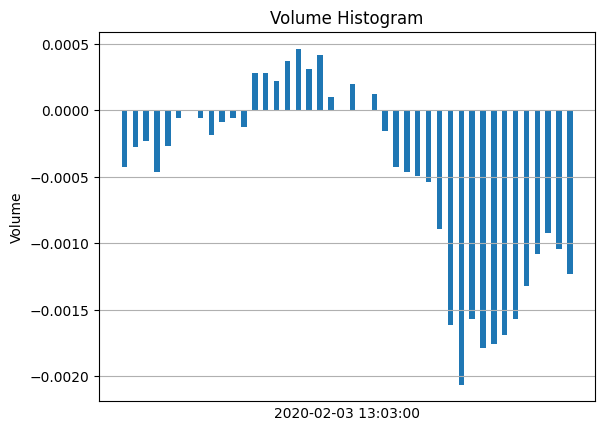

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_volume_histogram(csv_file, target_id):
    # CSV 파일을 읽습니다.
    df = pd.read_csv(csv_file)

    # 주어진 ID를 가진 행을 찾습니다.
    target_row = df[df['id'] == target_id]
    target_price = df['open'][list(df['id']).index(target_id)]

    if target_row.empty:
        print("해당 ID를 가진 행을 찾을 수 없습니다.")
        return

    # 주어진 ID의 앞뒤 20개의 행을 선택합니다.
    start_index = max(0, target_row.index[0] - 20)
    end_index = min(len(df), target_row.index[0] + 21)  # +1 을 추가하여 20개의 앞뒤 행을 선택합니다.

    # 선택된 범위의 volume 필드 데이터를 추출합니다.
    volume_data = (df.loc[start_index:end_index, 'open'] / target_price) - 1
    timestamp_data = df.loc[start_index:end_index, 'timestamp']

    # 히스토그램을 그립니다.
    plt.bar(range(len(volume_data)), volume_data, width=0.5, align='center')

    # 주어진 ID에 해당하는 경우에만 해당 timestamp 값을 밑에 표시합니다.
    if target_id in df['id'].values:
        target_index = list(df['id']).index(target_id)
        plt.xlabel(str(df['timestamp'][target_index]))  # 주어진 ID의 timestamp 값을 추가합니다.
    else:
        plt.xlabel('Timestamp')  # 다른 경우에는 각 막대 아래에 있는 timestamp를 표시하지 않습니다.

    plt.title('Volume Histogram')
    plt.ylabel('Volume')
    plt.xticks([])  # x 축의 눈금을 없앱니다.
    plt.grid(True)
    plt.show()

# 사용 예시
csv_file_path = 'SPY.csv'  # CSV 파일 경로를 제공하세요.
target_id = 214         # 검색할 ID를 입력하세요.
plot_volume_histogram(csv_file_path, target_id)

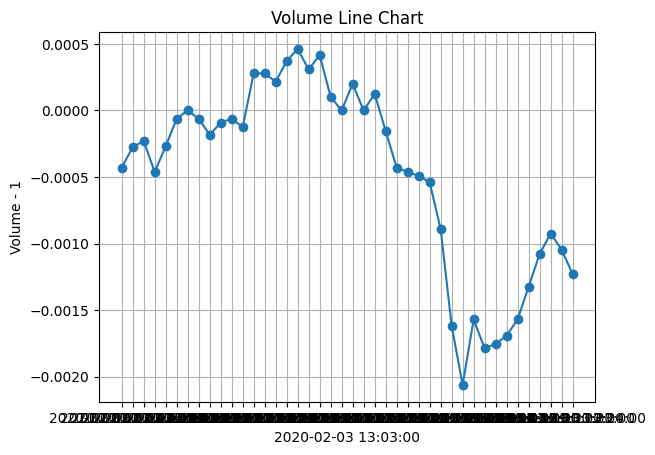

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_volume_line_chart(csv_file, target_id):
    # CSV 파일을 읽습니다.
    df = pd.read_csv(csv_file)

    # 주어진 ID를 가진 행을 찾습니다.
    target_row = df[df['id'] == target_id]
    target_price = df['open'][list(df['id']).index(target_id)]

    if target_row.empty:
        print("해당 ID를 가진 행을 찾을 수 없습니다.")
        return

    # 주어진 ID의 앞뒤 20개의 행을 선택합니다.
    start_index = max(0, target_row.index[0] - 20)
    end_index = min(len(df), target_row.index[0] + 21)  # +1 을 추가하여 20개의 앞뒤 행을 선택합니다.

    # 선택된 범위의 volume 필드 데이터를 추출하고 1을 빼줍니다.
    volume_data = (df.loc[start_index:end_index, 'open'] / target_price) - 1
    timestamp_data = df.loc[start_index:end_index, 'timestamp']

    # 꺾은선 그래프를 그립니다.
    plt.plot(timestamp_data, volume_data, marker='o', linestyle='-')

    # 주어진 ID에 해당하는 경우에만 해당 timestamp 값을 표시합니다.
    if target_id in df['id'].values:
        target_index = list(df['id']).index(target_id)
        plt.xlabel(str(df['timestamp'][target_index]))  # 주어진 ID의 timestamp 값을 추가합니다.
    else:
        plt.xlabel('Timestamp')  # 다른 경우에는 각 막대 아래에 있는 timestamp를 표시하지 않습니다.

    plt.title('Volume Line Chart')
    plt.ylabel('Volume - 1')  # y 축 레이블 수정
    plt.grid(True)
    plt.show()

# 사용 예시
csv_file_path = 'SPY.csv'  # CSV 파일 경로를 제공하세요.
target_id = 214         # 검색할 ID를 입력하세요.
plot_volume_line_chart(csv_file_path, target_id)


**월평균 VOLUME (전체)**

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


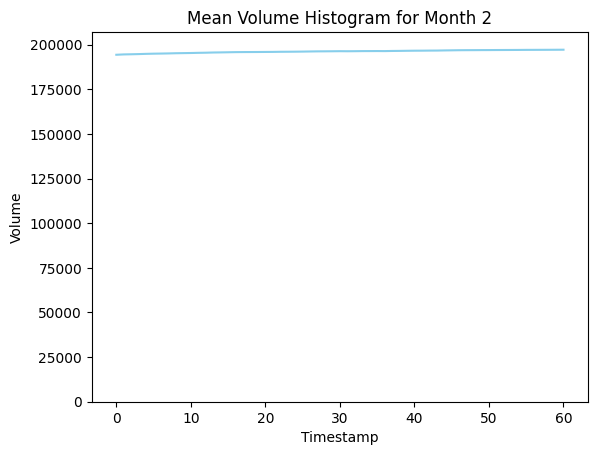

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_volume_histogram_mean(csv_file, target_month):
    # CSV 파일을 읽습니다.
    df = pd.read_csv(csv_file)

    # 'timestamp' 필드를 datetime 형식으로 변환합니다.
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # 입력받은 월과 일치하는 날짜 데이터를 가진 행을 필터링합니다.
    target_rows = df[df['timestamp'].dt.month == target_month]

    if target_rows.empty:
        print("해당 월에 해당하는 데이터를 찾을 수 없습니다.")
        return

    # 히스토그램을 그리기 위한 데이터를 저장할 리스트를 초기화합니다.
    histogram_data = []
    # 길이가 41이고 모든 원소가 0인 Series를 생성합니다.
    s = pd.Series([0] * 61)

# Series를 DataFrame으로 변환합니다.
    sum_rows = pd.DataFrame(s)
    start_index = max(0, 30 - 20)
    end_index = min(len(df), 30 + 21)
    volume_data = df.loc[start_index:end_index, 'volume'][10]

    # 각 행 주변의 20개 행을 선택하고 volume 데이터를 히스토그램으로 나타냅니다.
    for index, row in target_rows.iterrows():
        start_index = max(0, index)
        end_index = min(len(df), index + 61)
        for i in range(end_index - start_index):
          sum_rows[0][i] = sum_rows[0][i] + df.loc[start_index:end_index, 'volume'][start_index + i]
        volume_data = df.loc[start_index:end_index, 'volume']
        #print(volume_data)

      # sum_rows = (sum_rows + df.loc[start_index:end_index, 'volume'])/2


    for i in range(61):
      sum_rows[0][i] = sum_rows[0][i]/target_rows.shape[0]

    # 히스토그램들의 평균을 계산합니다.
    mean_histogram = np.mean(histogram_data, axis=0)

    plt.bar(range(len(sum_rows)), sum_rows, width=0.5, align='center')
    plt.plot(sum_rows[0].index, sum_rows[0], color='skyblue')

    # # 가로축에 중심 데이터의 timestamp를 라벨로 표시합니다.
    # center_index = len(mean_histogram) // 2
    # center_timestamp = target_rows.iloc[center_index]['timestamp']
    # plt.xticks([center_timestamp], [center_timestamp.strftime('%Y-%m-%d')])

    plt.title('Mean Volume Histogram for Month ' + str(target_month))
    plt.xlabel('Timestamp')
    plt.ylabel('Volume')
    plt.show()

# 사용 예시
csv_file_path = 'SPY.csv'  # CSV 파일 경로를 제공하세요.
target_month = 2  # 입력받은 월을 지정하세요.
plot_volume_histogram_mean(csv_file_path, target_month)


트럼프 트윗 시 평균 볼륨

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


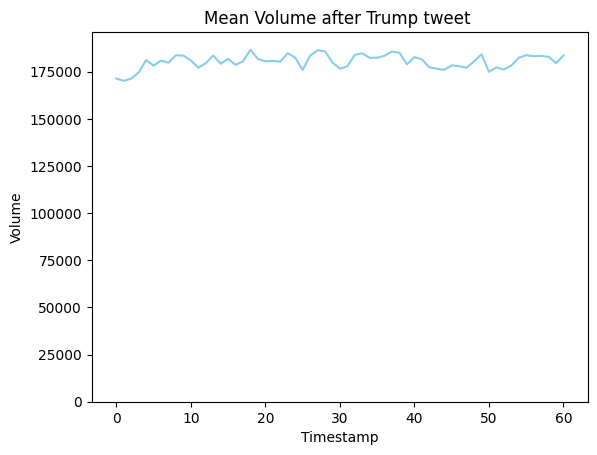

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_volume_histogram_mean(dictionary_file, csv_file):
    # CSV 파일을 읽습니다.
    df = pd.read_csv(csv_file)
    df_second = pd.read_csv(dictionary_file)

    df.set_index('id', inplace=True)
    ids_to_keep = df_second.iloc[:, 1]
    target_rows = df.loc[ids_to_keep]


    # 히스토그램을 그리기 위한 데이터를 저장할 리스트를 초기화합니다.
    histogram_data = []
    # 길이가 41이고 모든 원소가 0인 Series를 생성합니다.
    s = pd.Series([0] * 61)

# Series를 DataFrame으로 변환합니다.
    sum_rows = pd.DataFrame(s)
    start_index = max(0, 30 - 20)
    end_index = min(len(df), 30 + 21)
    volume_data = df.loc[start_index:end_index, 'volume'][10]


    # 각 행 주변의 20개 행을 선택하고 volume 데이터를 히스토그램으로 나타냅니다.
    for index, row in target_rows.iterrows():
        start_index = max(0, index)
        end_index = min(len(df), index + 61)
        for i in range(61):
          sum_rows[0][i] = sum_rows[0][i] + df.loc[start_index:end_index, 'volume'][start_index + i]
        volume_data = df.loc[start_index:end_index, 'volume']
        #print(volume_data)

      # sum_rows = (sum_rows + df.loc[start_index:end_index, 'volume'])/2

    num_data = target_rows.shape[0]
    initial_price = sum_rows[0][0]/num_data

    for i in range(61):
      sum_rows[0][i] = sum_rows[0][i]/target_rows.shape[0]

    # 히스토그램들의 평균을 계산합니다.
    mean_histogram = np.mean(histogram_data, axis=0)

    plt.bar(range(len(sum_rows)), sum_rows, width=0.5, align='center')
    plt.plot(sum_rows[0].index, sum_rows[0], color='skyblue')

    # # 가로축에 중심 데이터의 timestamp를 라벨로 표시합니다.
    # center_index = len(mean_histogram) // 2
    # center_timestamp = target_rows.iloc[center_index]['timestamp']
    # plt.xticks([center_timestamp], [center_timestamp.strftime('%Y-%m-%d')])

    plt.title('Mean Volume after Trump tweet ')
    plt.xlabel('Timestamp')
    plt.ylabel('Volume')
    plt.show()

# 사용 예시
dictionary_file_path = 'trump_dictionary.csv'
csv_file_path = 'SPY.csv'  # CSV 파일 경로를 제공하세요.
plot_volume_histogram_mean(dictionary_file_path, csv_file_path)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


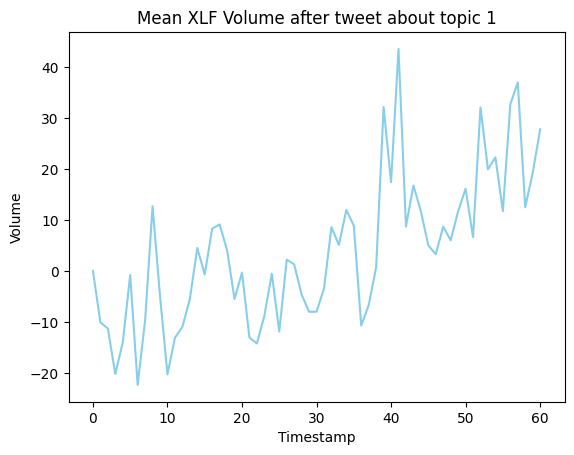

total127Tweets


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_volume_histogram_topic(dictionary_file, csv_file, topic_index):
    # CSV 파일을 읽습니다.
    df = pd.read_csv(csv_file)
    df_dict = pd.read_csv(dictionary_file)
    df_topic = pd.read_csv('topic_list.csv', header = None)


    first_row = df_topic.values[topic_index]
    first_row = first_row[~np.isnan(first_row)]

    df_dict = df_dict[df_dict.iloc[:,0].isin(first_row)]
# 결과를 CSV 파일로 저장합니다. 전치를 적용하여 열로 데이터를 저장합니다.


    df.set_index('id', inplace=True)
    ids_to_keep = df_dict.iloc[:, 1]
    target_rows = df.loc[ids_to_keep]

    # 히스토그램을 그리기 위한 데이터를 저장할 리스트를 초기화합니다.
    histogram_data = []
    # 길이가 41이고 모든 원소가 0인 Series를 생성합니다.
    s = pd.Series([0] * 61)

# Series를 DataFrame으로 변환합니다.
    sum_rows = pd.DataFrame(s)



    # 각 행 주변의 20개 행을 선택하고 volume 데이터를 히스토그램으로 나타냅니다.
    for index, row in target_rows.iterrows():
        start_index = max(0, index)
        end_index = min(len(df), index + 61)
        for i in range(61):
          sum_rows[0][i] = sum_rows[0][i] + df.loc[start_index:end_index, 'volume'][start_index + i]
        volume_data = df.loc[start_index:end_index, 'volume']
        #print(volume_data)

      # sum_rows = (sum_rows + df.loc[start_index:end_index, 'volume'])/2


    num_data = target_rows.shape[0]
    initial_price = sum_rows[0][0]/num_data

    for i in range(61):
      sum_rows[0][i] =(((sum_rows[0][i]/num_data)/initial_price) * 100) - 100

    # 히스토그램들의 평균을 계산합니다.
    mean_histogram = np.mean(histogram_data, axis=0)

    plt.bar(range(len(sum_rows)), sum_rows, width=0.5, align='center')
    plt.plot(sum_rows[0].index, sum_rows[0], color='skyblue')

    # # 가로축에 중심 데이터의 timestamp를 라벨로 표시합니다.
    # center_index = len(mean_histogram) // 2
    # center_timestamp = target_rows.iloc[center_index]['timestamp']
    # plt.xticks([center_timestamp], [center_timestamp.strftime('%Y-%m-%d')])

    plt.title('Mean ' + str(csv_file.split('.')[0]) + ' Volume after tweet about topic ' + str(topic_index))
    plt.xlabel('Timestamp')
    plt.ylabel('Volume')
    plt.show()
    print('total ' + str(num_data) + ' Tweets')

# 사용 예시
dictionary_file_path = 'trump_dictionary.csv'
csv_file_path = 'XLF.csv'  # CSV 파일 경로를 제공하세요.
topic_file_path = ''
plot_volume_histogram_topic(dictionary_file_path, csv_file_path, 1)


id 들이 주어졌을 때, 월별로 분리


In [ ]:
import datetime as dt

def classify_by_month(csv_file, target_array, result):
    # CSV 파일을 DataFrame으로 읽어옵니다.
    df = pd.read_csv(csv_file)

    # 배열의 각 정수 데이터를 순회하면서 처리합니다.
    for num in target_array:
        # 해당 정수를 id로 가지는 행을 찾습니다.
        target_row = df[df['id'] == num]

        # 특정 월에 해당하는 데이터가 없는 경우 처리
        if target_row.empty:
            print(f"ID {num}에 해당하는 데이터가 없습니다.")
            continue

        # 해당 행의 timestamp 값을 가져와서 해당 월을 추출합니다.
        timestamp = target_row.iloc[0]['timestamp']
        month = dt.datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S').month

        # 결과 딕셔너리에 월별로 데이터를 추가합니다.
        if month not in result:
            result[month] = [num]
        else:
            result[month].append(num)

result = {}
target_array = [1, 1000, 10000, 20000]
classify_by_month('SPY.csv', target_array, result)
print(result)

{2: [1, 1000], 3: [10000], 4: [20000]}


4
[16561, 17236, 17248, 17324, 17333, 17334, 17470, 18056, 18198, 18265, 19306, 19350, 19811, 20058, 20079, 20486, 20578, 20886, 20983, 21055, 21093, 21111, 21943, 21946, 21949, 21950, 21953, 22425, 22426, 22432, 22495, 22736, 22817, 22824, 22877, 23223, 23230, 23557, 23565, 23873, 23882, 23886, 23889, 23890, 23917, 23933, 23934, 23939, 23943, 23945, 23946, 23962, 24015, 24043]
                 timestamp     open     high      low    close   volume
id                                                                     
16561  2020-04-02 13:26:00  234.902  235.083  234.245  234.415   506583
17236  2020-04-06 11:41:00  245.820  246.045  245.638  245.887   155877
17248  2020-04-06 11:53:00  246.472  246.529  246.119  246.266   223513
17324  2020-04-06 13:09:00  247.435  247.600  247.195  247.436   157035
17333  2020-04-06 13:18:00  247.208  247.460  246.997  247.294   165648
17334  2020-04-06 13:19:00  247.359  247.488  247.157  247.332   139197
17470  2020-04-06 15:35:00  248.417  248.64

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


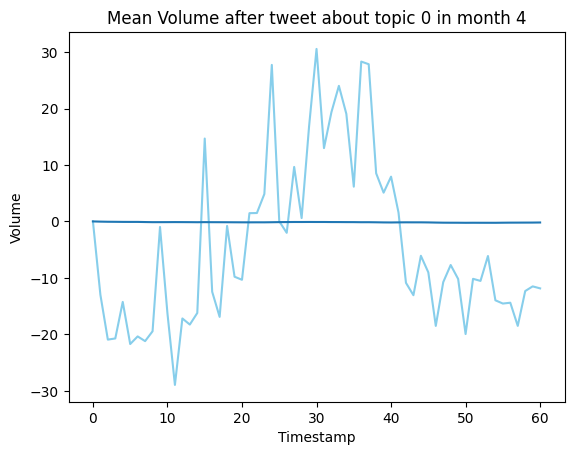

4
[16553, 17301, 17830, 18061, 18082, 18614, 20456, 21945, 22424, 22445, 22458, 22466, 22502, 22505, 23112, 23871]
                 timestamp     open     high      low    close  volume
id                                                                    
16553  2020-04-02 13:18:00  234.926  235.312  234.745  235.199  234079
17301  2020-04-06 12:46:00  247.227  247.460  247.064  247.308  202641
17830  2020-04-07 15:05:00  252.960  253.440  252.670  253.082  498471
18061  2020-04-08 12:26:00  256.256  256.444  255.935  256.062  202075
18082  2020-04-08 12:47:00  256.936  257.076  256.719  256.840  213066
18614  2020-04-09 15:09:00  261.687  262.045  261.504  261.872  415207
20456  2020-04-17 13:21:00  268.723  268.809  268.376  268.557  173624
21945  2020-04-23 12:10:00  266.976  267.052  266.696  266.829   97700
22424  2020-04-24 13:39:00  264.860  264.955  264.638  264.809   67488
22445  2020-04-24 14:00:00  265.871  266.022  265.601  265.687  254779
22458  2020-04-24 14:13:00  266.1

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


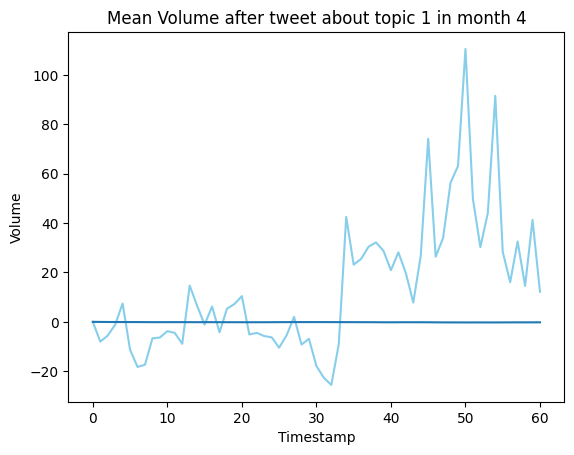

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_volume_histogram_mean_topic_month(dictionary_file, csv_file, topic_index, month):
    # CSV 파일을 읽습니다.
    df = pd.read_csv(csv_file)
    df_dict = pd.read_csv(dictionary_file)
    df_topic = pd.read_csv('topic_list.csv', header = None)

    first_row = df_topic.values[topic_index]
    first_row = first_row[~np.isnan(first_row)]

    df_dict = df_dict[df_dict.iloc[:,0].isin(first_row)]
  # 결과를 CSV 파일로 저장합니다. 전치를 적용하여 열로 데이터를 저장합니다.

    df.set_index('id', inplace=True)
    ids_to_keep = df_dict.iloc[:, 1].tolist()
    target_rows = df.loc[ids_to_keep]
    df.reset_index(drop = False, inplace = True)
    results = {}


    # 배열의 각 정수 데이터를 순회하면서 처리합니다.
    for num in ids_to_keep:
        # 해당 정수를 id로 가지는 행을 찾습니다.
        row = df[df['id'] == num]

        # 특정 월에 해당하는 데이터가 없는 경우 처리
        if row.empty:
            print(f"ID {num}에 해당하는 데이터가 없습니다.")
            continue

        # 해당 행의 timestamp 값을 가져와서 해당 월을 추출합니다.
        timestamp = row.iloc[0]['timestamp']
        month_idx = dt.datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S').month

        # 결과 딕셔너리에 월별로 데이터를 추가합니다.
        if month_idx not in results:
            results[month_idx] = [num]
        else:
            results[month_idx].append(num)

    print(month)
    print(results[month])
    first_row = results[month]


# 결과를 CSV 파일로 저장합니다. 전치를 적용하여 열로 데이터를 저장합니다.


    df.set_index('id', inplace=True)
    target_rows = df.loc[first_row]


    # 히스토그램을 그리기 위한 데이터를 저장할 리스트를 초기화합니다.
    histogram_data = []
    # 길이가 41이고 모든 원소가 0인 Series를 생성합니다.
    s = pd.Series([0] * 61)

# Series를 DataFrame으로 변환합니다.
    sum_rows = pd.DataFrame(s)



    # 각 행 주변의 20개 행을 선택하고 volume 데이터를 히스토그램으로 나타냅니다.
    for index, row in target_rows.iterrows():
        start_index = max(0, index)
        end_index = min(len(df), index + 61)
        for i in range(61):
          sum_rows[0][i] = sum_rows[0][i] + df.loc[start_index:end_index, 'volume'][start_index + i]
        volume_data = df.loc[start_index:end_index, 'volume']
        #print(volume_data)

      # sum_rows = (sum_rows + df.loc[start_index:end_index, 'volume'])/2

    num_data = target_rows.shape[0]
    initial_price = sum_rows[0][0]/num_data

    for i in range(61):
      sum_rows[0][i] = (((sum_rows[0][i]/num_data)/initial_price) * 100) - 100

    # 히스토그램들의 평균을 계산합니다.
    mean_histogram = np.mean(histogram_data, axis=0)

    plt.bar(range(len(sum_rows)), sum_rows, width=0.5, align='center')
    plt.plot(sum_rows[0].index, sum_rows[0], color='skyblue')


    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # 입력받은 월과 일치하는 날짜 데이터를 가진 행을 필터링합니다.
    target_rows = df[df['timestamp'].dt.month == month]


    # 히스토그램을 그리기 위한 데이터를 저장할 리스트를 초기화합니다.
    # 길이가 41이고 모든 원소가 0인 Series를 생성합니다.
    s = pd.Series([0] * 61)

# Series를 DataFrame으로 변환합니다.
    sum_rows = pd.DataFrame(s)

    # 각 행 주변의 20개 행을 선택하고 volume 데이터를 히스토그램으로 나타냅니다.
    for index, row in target_rows.iterrows():
        start_index = max(0, index)
        end_index = min(len(df), index + 61)
        for i in range(end_index - start_index):
          sum_rows[0][i] = sum_rows[0][i] + df.loc[start_index:end_index, 'volume'][start_index + i]
        volume_data = df.loc[start_index:end_index, 'volume']
        #print(volume_data)

      # sum_rows = (sum_rows + df.loc[start_index:end_index, 'volume'])/2

    num_data = target_rows.shape[0]
    initial_price = sum_rows[0][0]/num_data

    for i in range(61):
      sum_rows[0][i] = (((sum_rows[0][i]/num_data)/initial_price) * 100) - 100
    plt.plot(sum_rows[0].index, sum_rows[0])

    # # 가로축에 중심 데이터의 timestamp를 라벨로 표시합니다.
    # center_index = len(mean_histogram) // 2
    # center_timestamp = target_rows.iloc[center_index]['timestamp']
    # plt.xticks([center_timestamp], [center_timestamp.strftime('%Y-%m-%d')])

    plt.title('Mean Volume after tweet about topic ' + str(topic_index) + ' in month ' + str(month))
    plt.xlabel('Timestamp')
    plt.ylabel('Volume')
    plt.show()

# 사용 예시
dictionary_file_path = 'trump_dictionary.csv'
csv_file_path = 'SPY.csv'  # CSV 파일 경로를 제공하세요.
topic_file_path = ''
plot_volume_histogram_mean_topic_month(dictionary_file_path, csv_file_path, 0, 4)
plot_volume_histogram_mean_topic_month(dictionary_file_path, csv_file_path, 1, 4)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


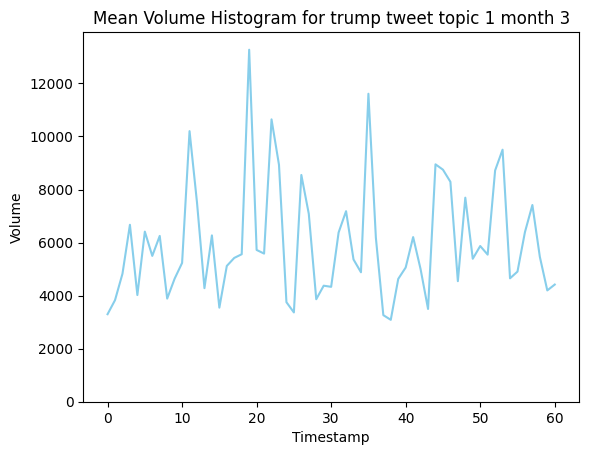

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_volume_histogram_mean_topic_month(dictionary_file, csv_file, topic_index, month):
    # CSV 파일을 읽습니다.
    df = pd.read_csv(csv_file)
    df_dict = pd.read_csv(dictionary_file)
    df_topic = pd.read_csv('topic_list.csv', header = None)


    first_row = df_topic.values[topic_index]
    first_row = first_row[~np.isnan(first_row)]
    results = {}
    classify_by_month('XLC.csv', first_row, results)
    first_row = results[month]
    df_dict = df_dict[df_dict.iloc[:,0].isin(first_row)]
# 결과를 CSV 파일로 저장합니다. 전치를 적용하여 열로 데이터를 저장합니다.


    df.set_index('id', inplace=True)
    target_rows = df.loc[first_row]

    # 히스토그램을 그리기 위한 데이터를 저장할 리스트를 초기화합니다.
    histogram_data = []
    # 길이가 41이고 모든 원소가 0인 Series를 생성합니다.
    s = pd.Series([0] * 61)

# Series를 DataFrame으로 변환합니다.
    sum_rows = pd.DataFrame(s)



    # 각 행 주변의 20개 행을 선택하고 volume 데이터를 히스토그램으로 나타냅니다.
    for index, row in target_rows.iterrows():
        start_index = max(0, index)
        end_index = min(len(df), index + 61)
        for i in range(61):
          sum_rows[0][i] = sum_rows[0][i] + df.loc[start_index:end_index, 'volume'][start_index + i]
        volume_data = df.loc[start_index:end_index, 'volume']
        #print(volume_data)

      # sum_rows = (sum_rows + df.loc[start_index:end_index, 'volume'])/2



    for i in range(61):
      sum_rows[0][i] = sum_rows[0][i]/target_rows.shape[0]

    # 히스토그램들의 평균을 계산합니다.
    mean_histogram = np.mean(histogram_data, axis=0)

    plt.bar(range(len(sum_rows)), sum_rows, width=0.5, align='center')
    plt.plot(sum_rows[0].index, sum_rows[0], color='skyblue')

    # # 가로축에 중심 데이터의 timestamp를 라벨로 표시합니다.
    # center_index = len(mean_histogram) // 2
    # center_timestamp = target_rows.iloc[center_index]['timestamp']
    # plt.xticks([center_timestamp], [center_timestamp.strftime('%Y-%m-%d')])

    plt.title('Mean Volume Histogram for trump tweet topic ' + str(topic_index) + ' month ' + str(month))
    plt.xlabel('Timestamp')
    plt.ylabel('Volume')
    plt.show()

# 사용 예시
dictionary_file_path = 'trump_dictionary.csv'
csv_file_path = 'XLC.csv'  # CSV 파일 경로를 제공하세요.
topic_file_path = ''
plot_volume_histogram_mean_topic_month(dictionary_file_path, csv_file_path, 1, 3)


# Topic, Volume

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


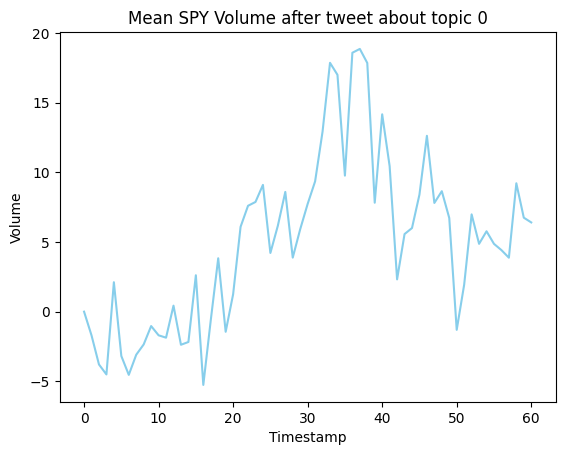

total596Tweets


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


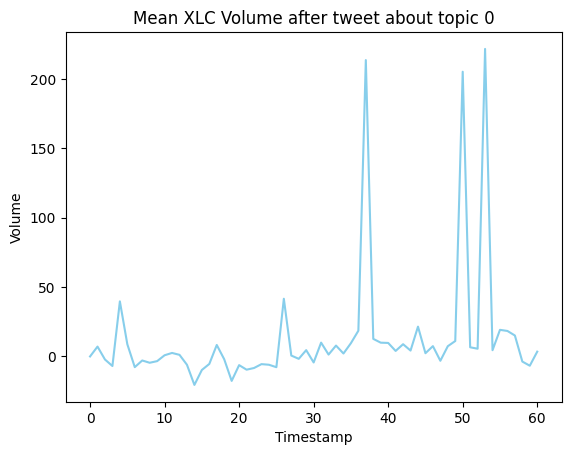

total596Tweets


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


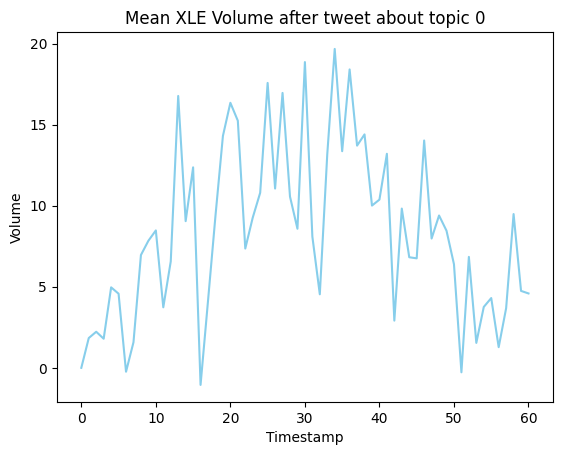

total596Tweets


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


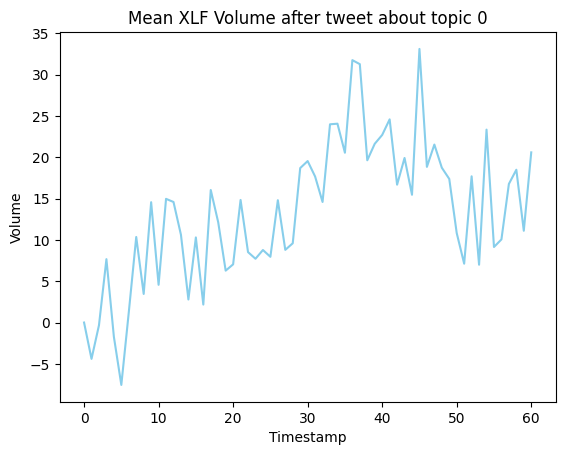

total596Tweets


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


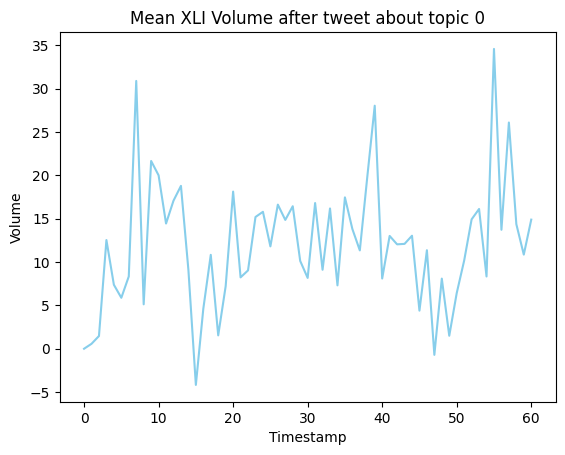

total596Tweets


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


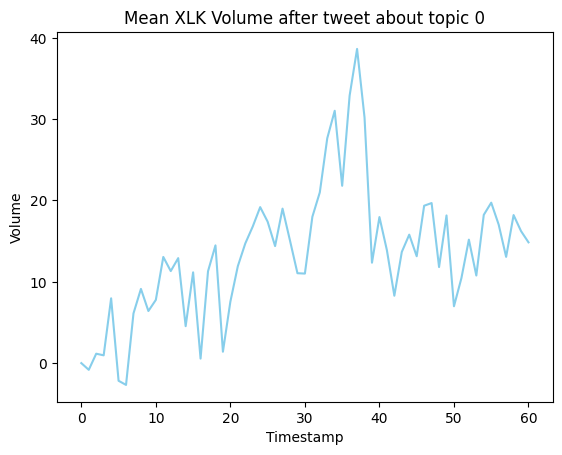

total596Tweets


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


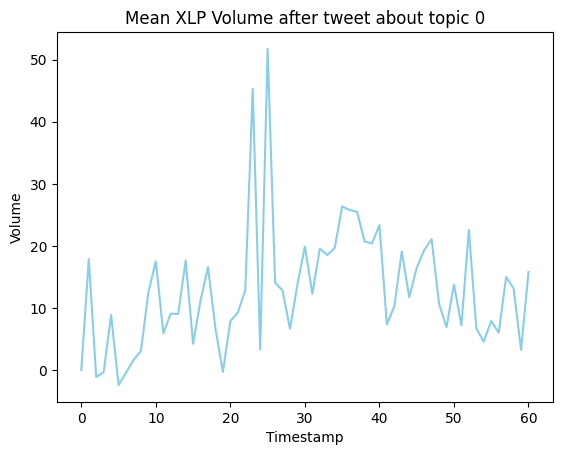

total596Tweets


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


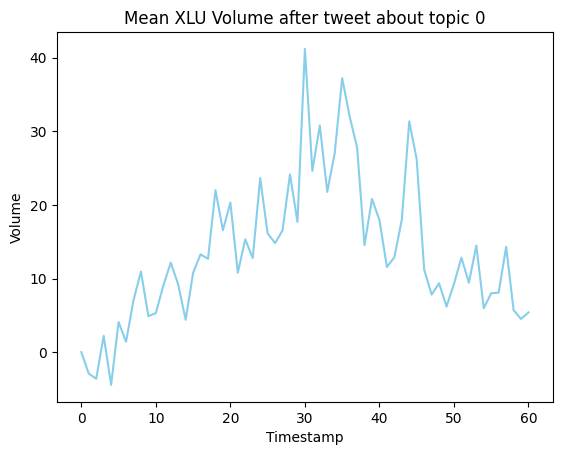

total596Tweets


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


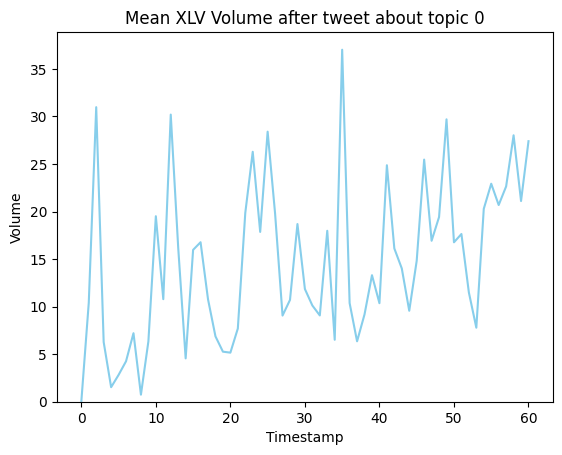

total596Tweets


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


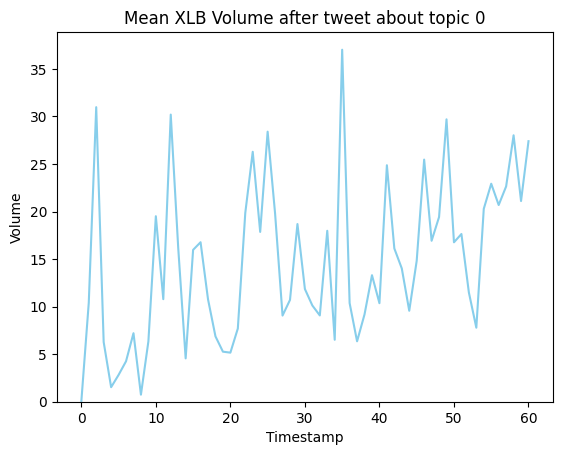

total596Tweets


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


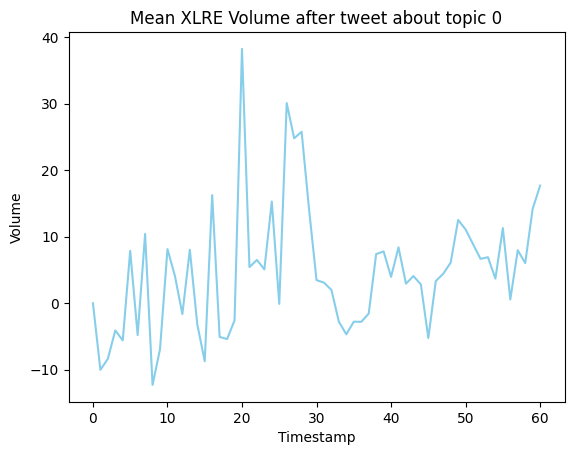

total596Tweets


In [ ]:
stock = ['SPY.csv', 'XLC.csv', 'XLE.csv', 'XLF.csv', 'XLI.csv', 'XLK.csv', 'XLP.csv', 'XLU.csv', 'XLV.csv', 'XLB.csv', 'XLRE.csv']

topic_index = 0
for i in range(len(stock)):
  plot_volume_histogram_topic('trump_dictionary.csv', stock[i], topic_index)


           0
0   2695.032
1   2695.663
2   2695.822
3   2695.522
4   2695.658
..       ...
56  2691.418
57  2691.655
58  2693.067
59  2692.479
60  2692.683

[61 rows x 1 columns]
           0
0   0.000000
1   0.000234
2   0.000293
3   0.000182
4   0.000232
..       ...
56 -0.001341
57 -0.001253
58 -0.000729
59 -0.000947
60 -0.000872

[61 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


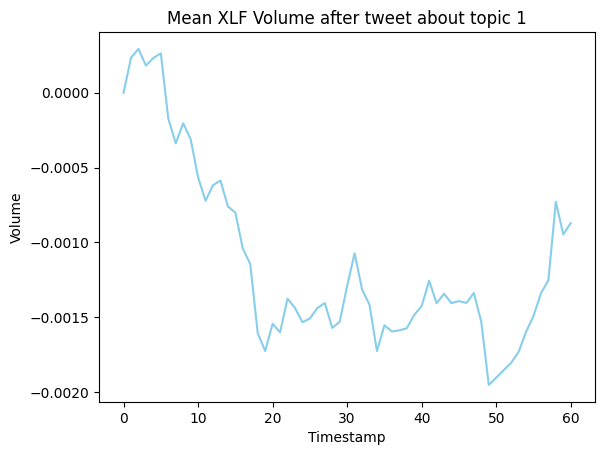

total 127 Tweets


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_return_histogram_topic(dictionary_file, csv_file, topic_index):
    # CSV 파일을 읽습니다.
    df = pd.read_csv(csv_file)
    df_dict = pd.read_csv(dictionary_file)
    df_topic = pd.read_csv('topic_list.csv', header = None)


    first_row = df_topic.values[topic_index]
    first_row = first_row[~np.isnan(first_row)]

    df_dict = df_dict[df_dict.iloc[:,0].isin(first_row)]
# 결과를 CSV 파일로 저장합니다. 전치를 적용하여 열로 데이터를 저장합니다.


    df.set_index('id', inplace=True)
    ids_to_keep = df_dict.iloc[:, 1]
    target_rows = df.loc[ids_to_keep]

    # 히스토그램을 그리기 위한 데이터를 저장할 리스트를 초기화합니다.
    histogram_data = []
    # 길이가 41이고 모든 원소가 0인 Series를 생성합니다.
    s = pd.Series([0] * 61)

# Series를 DataFrame으로 변환합니다.
    sum_rows = pd.DataFrame(s)



    # 각 행 주변의 20개 행을 선택하고 volume 데이터를 히스토그램으로 나타냅니다.
    for index, row in target_rows.iterrows():
        start_index = max(0, index)
        end_index = min(len(df), index + 61)
        for i in range(61):
          sum_rows[0][i] = sum_rows[0][i] + df.loc[start_index:end_index, 'open'][start_index + i]
        price_data = df.loc[start_index:end_index, 'open']
        #print(volume_data)

      # sum_rows = (sum_rows + df.loc[start_index:end_index, 'volume'])/2


    num_data = target_rows.shape[0]
    initial_price = sum_rows[0][0]
    print(sum_rows)

    for i in range(61):
      sum_rows[0][i] =(((sum_rows[0][i] -  initial_price)/initial_price))

    print(sum_rows)

    # 히스토그램들의 평균을 계산합니다.
    mean_histogram = np.mean(histogram_data, axis=0)

    plt.bar(range(len(sum_rows)), sum_rows, width=0.5, align='center')
    plt.plot(sum_rows[0].index, sum_rows[0], color='skyblue')

    # # 가로축에 중심 데이터의 timestamp를 라벨로 표시합니다.
    # center_index = len(mean_histogram) // 2
    # center_timestamp = target_rows.iloc[center_index]['timestamp']
    # plt.xticks([center_timestamp], [center_timestamp.strftime('%Y-%m-%d')])

    plt.title('Mean ' + str(csv_file.split('.')[0]) + ' Volume after tweet about topic ' + str(topic_index))
    plt.xlabel('Timestamp')
    plt.ylabel('Volume')
    plt.show()
    print('total ' + str(num_data) + ' Tweets')

# 사용 예시
dictionary_file_path = 'trump_dictionary.csv'
csv_file_path = 'XLF.csv'  # CSV 파일 경로를 제공하세요.
topic_file_path = ''
plot_volume_histogram_topic(dictionary_file_path, csv_file_path, 1)


             0
0   178707.663
1   178708.656
2   178702.264
3   178702.310
4   178702.137
..         ...
56  178760.152
57  178758.981
58  178759.568
59  178761.198
60  178764.844

[61 rows x 1 columns]
           0
0   0.000000
1   0.000006
2  -0.000030
3  -0.000030
4  -0.000031
..       ...
56  0.000294
57  0.000287
58  0.000290
59  0.000300
60  0.000320

[61 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


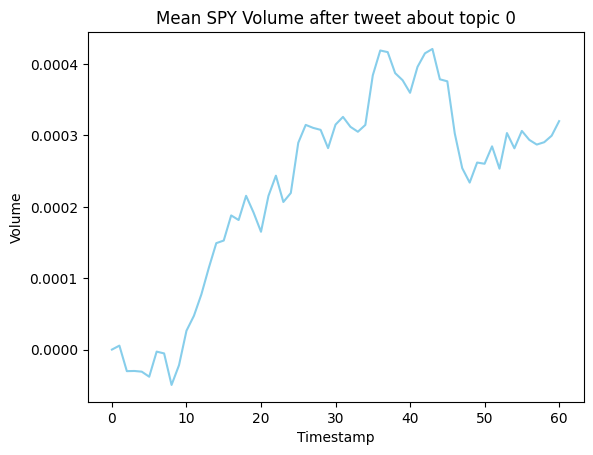

total 596 Tweets
            0
0   32086.116
1   32085.824
2   32085.075
3   32085.075
4   32087.748
..        ...
56  32092.081
57  32090.411
58  32088.224
59  32087.091
60  32086.074

[61 rows x 1 columns]
           0
0   0.000000
1  -0.000009
2  -0.000032
3  -0.000032
4   0.000051
..       ...
56  0.000186
57  0.000134
58  0.000066
59  0.000030
60 -0.000001

[61 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


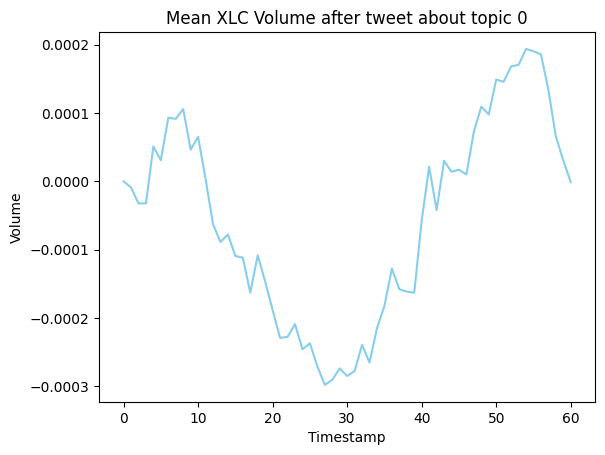

total 596 Tweets
            0
0   18770.120
1   18769.955
2   18769.373
3   18768.954
4   18768.767
..        ...
56  18763.482
57  18762.620
58  18762.823
59  18763.075
60  18763.091

[61 rows x 1 columns]
           0
0   0.000000
1  -0.000009
2  -0.000040
3  -0.000062
4  -0.000072
..       ...
56 -0.000354
57 -0.000400
58 -0.000389
59 -0.000375
60 -0.000374

[61 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


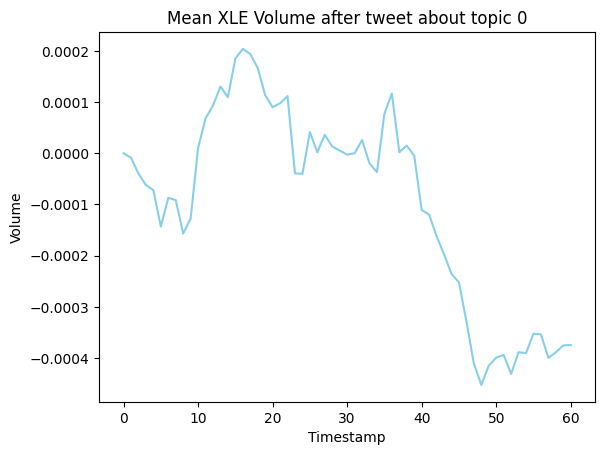

total 596 Tweets
            0
0   13653.917
1   13653.893
2   13652.910
3   13652.744
4   13652.683
..        ...
56  13658.739
57  13658.311
58  13658.234
59  13658.070
60  13658.188

[61 rows x 1 columns]
           0
0   0.000000
1  -0.000002
2  -0.000074
3  -0.000086
4  -0.000090
..       ...
56  0.000353
57  0.000322
58  0.000316
59  0.000304
60  0.000313

[61 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


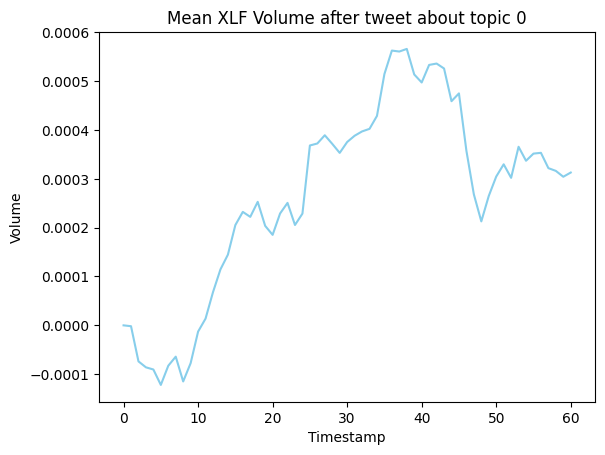

total 596 Tweets
            0
0   41022.259
1   41020.730
2   41022.047
3   41022.625
4   41021.729
..        ...
56  41033.748
57  41035.759
58  41036.708
59  41036.626
60  41037.411

[61 rows x 1 columns]
           0
0   0.000000
1  -0.000037
2  -0.000005
3   0.000009
4  -0.000013
..       ...
56  0.000280
57  0.000329
58  0.000352
59  0.000350
60  0.000369

[61 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


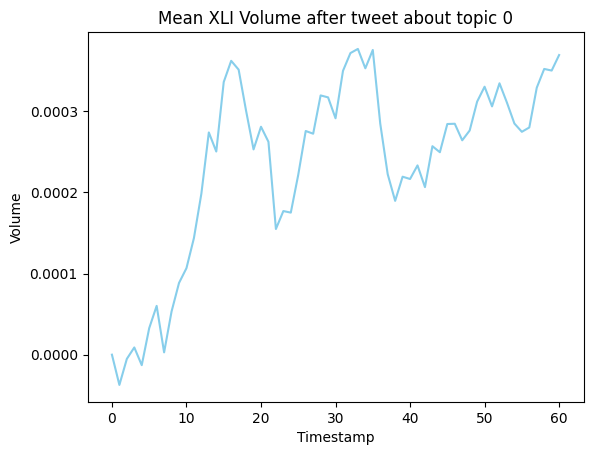

total 596 Tweets
            0
0   60056.536
1   60057.047
2   60055.127
3   60055.810
4   60055.308
..        ...
56  60073.280
57  60072.856
58  60074.254
59  60074.617
60  60076.306

[61 rows x 1 columns]
           0
0   0.000000
1   0.000009
2  -0.000023
3  -0.000012
4  -0.000020
..       ...
56  0.000279
57  0.000272
58  0.000295
59  0.000301
60  0.000329

[61 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


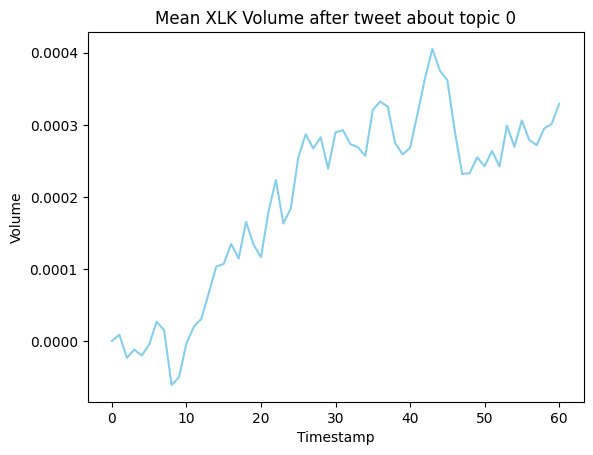

total 596 Tweets
            0
0   33457.354
1   33457.623
2   33456.002
3   33455.575
4   33456.477
..        ...
56  33454.827
57  33456.397
58  33456.137
59  33456.502
60  33458.153

[61 rows x 1 columns]
           0
0   0.000000
1   0.000008
2  -0.000040
3  -0.000053
4  -0.000026
..       ...
56 -0.000076
57 -0.000029
58 -0.000036
59 -0.000025
60  0.000024

[61 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


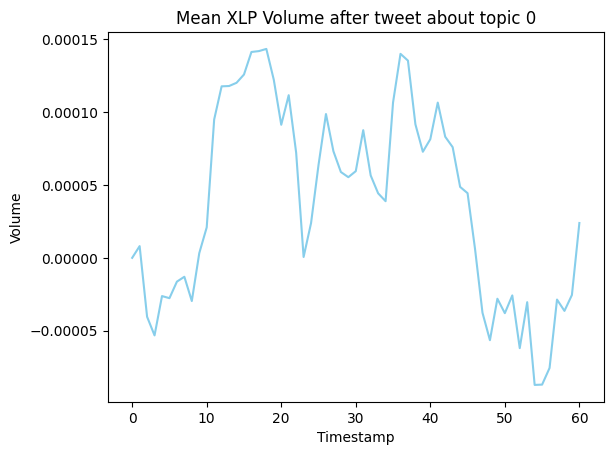

total 596 Tweets
            0
0   32316.328
1   32314.946
2   32314.709
3   32316.432
4   32317.082
..        ...
56  32339.691
57  32339.241
58  32339.661
59  32340.247
60  32339.295

[61 rows x 1 columns]
           0
0   0.000000
1  -0.000043
2  -0.000050
3   0.000003
4   0.000023
..       ...
56  0.000723
57  0.000709
58  0.000722
59  0.000740
60  0.000711

[61 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


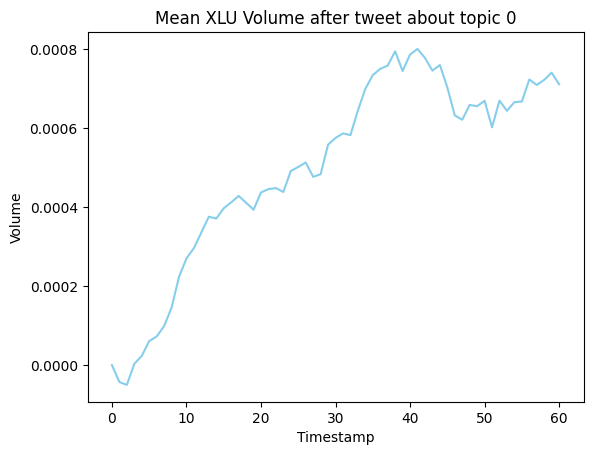

total 596 Tweets
            0
0   32337.157
1   32337.320
2   32338.251
3   32337.736
4   32337.930
..        ...
56  32332.140
57  32333.628
58  32332.778
59  32335.277
60  32334.624

[61 rows x 1 columns]
           0
0   0.000000
1   0.000005
2   0.000034
3   0.000018
4   0.000024
..       ...
56 -0.000155
57 -0.000109
58 -0.000135
59 -0.000058
60 -0.000078

[61 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


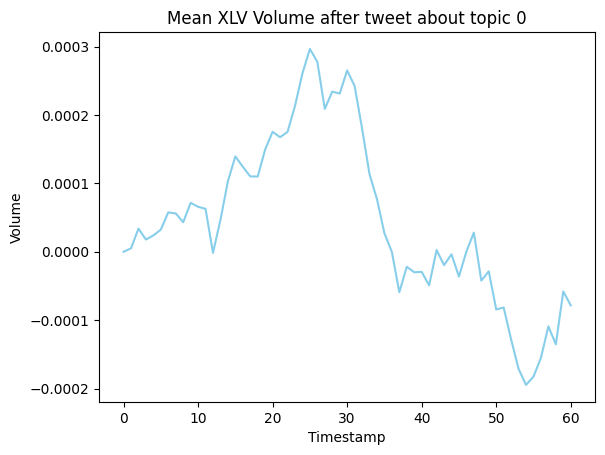

total 596 Tweets
            0
0   32337.157
1   32337.320
2   32338.251
3   32337.736
4   32337.930
..        ...
56  32332.140
57  32333.628
58  32332.778
59  32335.277
60  32334.624

[61 rows x 1 columns]
           0
0   0.000000
1   0.000005
2   0.000034
3   0.000018
4   0.000024
..       ...
56 -0.000155
57 -0.000109
58 -0.000135
59 -0.000058
60 -0.000078

[61 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


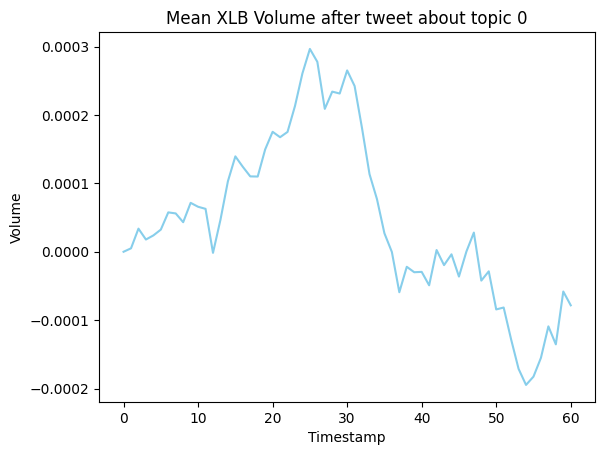

total 596 Tweets
            0
0   18742.158
1   18742.317
2   18741.837
3   18740.732
4   18741.386
..        ...
56  18726.135
57  18726.388
58  18725.545
59  18725.303
60  18727.255

[61 rows x 1 columns]
           0
0   0.000000
1   0.000008
2  -0.000017
3  -0.000076
4  -0.000041
..       ...
56 -0.000855
57 -0.000841
58 -0.000886
59 -0.000899
60 -0.000795

[61 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


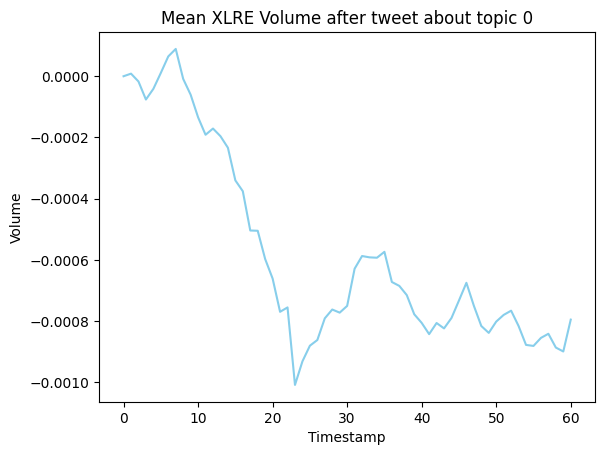

total 596 Tweets


In [ ]:
stock = ['SPY.csv', 'XLC.csv', 'XLE.csv', 'XLF.csv', 'XLI.csv', 'XLK.csv', 'XLP.csv', 'XLU.csv', 'XLV.csv', 'XLB.csv', 'XLRE.csv']

topic_index = 0
for i in range(len(stock)):
  plot_return_histogram_topic('trump_dictionary.csv', stock[i], topic_index)


In [3]:
china = [139, 140, 509, 511, 516, 519, 876, 995, 1093, 1097, 1208, 1360, 1362, 1363, 1565, 1572, 1575, 1606, 1612, 1621, 1634, 1643, 1649, 1651, 1657, 1679, 1680, 1682, 1684, 1788, 1813, 1814, 1815, 1942, 1961, 1975, 1977, 1994, 2059, 2067, 2184, 2201, 2202, 2328, 2329, 2376, 2378, 2391, 2431, 2437, 2438, 2439, 2442, 2443, 2445, 2543, 2662, 2666, 2756, 2760, 2772, 2802, 2998, 3059, 3063, 3065, 3069, 3097, 3112, 3282, 3286, 3356, 3380, 3572, 3573, 3574, 3604, 3608, 3650, 3666, 3696, 3985, 4124, 4126, 4413, 4491, 4676, 4678, 4867, 5075, 5077, 5099, 5120, 5325, 5404, 5441, 5461, 5604, 5613, 5623, 5624, 5723, 5740, 5858, 5860, 5912, 5967, 5972, 5974, 6044, 6057, 6602, 6968, 7146, 7148, 7258, 7565, 7671, 7672, 7734, 7852, 8347, 8421, 8603, 8861, 8868, 8901, 9310, 9413, 9539, 9540]

airport_senate = [167, 590, 620, 689, 1168, 1179, 1182, 1183, 1315, 1559, 1681, 2185, 2377, 2542, 2545, 2566, 2622, 2623, 2626, 2635, 2637, 2656, 3108, 3153, 3154, 3360, 3362, 3895, 3903, 3962, 4020, 4022, 4034, 4037, 4048, 4049, 4053, 4055, 4056, 4057, 4058, 4061, 4062, 4068, 4070, 4076, 4078, 4080, 4083, 4089, 4095, 4097, 4098, 4103, 4105, 4108, 4115, 4116, 4119, 4121, 4122, 4125, 4128, 4134, 4138, 4396, 4403, 4411, 5590, 5591, 5593, 5594, 5595, 5596, 5597, 5598, 5599, 5600, 5601, 5602, 5603, 5605, 5606, 5607, 5608, 5610, 5676, 5693, 5694, 5695, 5696, 5697, 5699, 5727, 5889, 5947, 7978, 8742, 8751, 8921, 9406]

#covid = [770, 772, 868, 871, 872, 874, 1039, 1040, 1085, 1092, 1108, 1160, 1165, 1166, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1180, 1181, 1184, 1185, 1186, 1187, 1188, 1189, 1207, 1209, 1213, 1316, 1318, 1321, 1382, 1442, 1562, 1573, 1574, 1578, 1619, 1772, 1786, 1790, 1936, 1945, 2054, 2055, 2062, 2065, 2399, 2434, 2550, 2562, 2564, 2570, 2771, 2801, 2804, 2996, 3106, 3276, 3665, 3843, 4033, 4039, 4040, 4052, 4059, 4074, 4079, 4090, 4104, 4112, 4117, 4139, 4409, 4842, 5223, 5285, 5326, 5403, 5447, 5472, 5589, 5687, 7678, 7888, 7889, 7890, 7892, 8416, 8532, 8539]

economy_market = [84, 358, 559, 589, 878, 926, 927, 1036, 1095, 1096, 1114, 1210, 1560, 1622, 1623, 1783, 1816, 1823, 1824, 1980, 2051, 2157, 2158, 2360, 2436, 2547, 2591, 2620, 2775, 2776, 3068, 3096, 3111, 3289, 3543, 3571, 3984, 4109, 4113, 4144, 4145, 4149, 4151, 4275, 4287, 4292, 4293, 4294, 4296, 4299, 4315, 4321, 4333, 4360, 4500, 4913, 4914, 4977, 5074, 5080, 5106, 5406, 5865, 6045, 6129, 6337, 6550, 6998, 7147, 7150, 7152, 7237, 7425, 7584, 8100, 8101, 8317, 8617, 8629, 8666, 8912, 8935, 9069, 9087, 9463, 9500, 9862]

great_america = [88, 355, 489, 512, 513, 517, 560, 688, 877, 920, 965, 1072, 1113, 1119, 1144, 1287, 1288, 1369, 1580, 1611, 1660, 1938, 1939, 1981, 1995, 2066, 2186, 2380, 2657, 3057, 3061, 3062, 3070, 3266, 3280, 3281, 3283, 3363, 3542, 3698, 3699, 3881, 3955, 3988, 4030, 4051, 4085, 4102, 4137, 4307, 4308, 4309, 4593, 4863, 4872, 5231, 5399, 5402, 5484, 5485, 5486, 5884, 5886, 5915, 5975, 6156, 6411, 6892, 6940, 7207, 7336, 7371, 7427, 7676, 7893, 7904, 8331, 8628, 8667, 9126, 9313, 9389, 9397, 9412, 9416, 9542]

#israel = [145, 146, 148, 622, 623, 624, 625, 626, 731, 1554, 1635, 1659, 1976, 2072, 2177, 2382, 3284, 3996, 3997, 5609, 5682, 6090, 6091, 6113, 6114, 6118, 6121, 6150, 6153, 6161, 7141, 7318, 7320, 7321, 7322, 7323, 7324, 7325, 7327, 7328, 7329, 7330, 7331, 7333, 7428, 7429, 7430, 7431, 7673, 7853, 8424, 9377, 9390]

# fake = [1822, 1973, 2595, 2820, 3305, 4141, 4142, 4143, 4147, 4148, 4418, 4936, 5401, 5913, 5917, 5982, 6083, 6292, 6947, 7567, 7639, 7812, 8493, 8540, 8758, 8864, 9067, 9086, 9124]

# healthcare_drug = [68, 1211, 1361, 3901, 3902, 4072, 5282, 5657, 5658, 5692, 5726, 5887, 6086, 6392, 6414, 7316, 7566, 7569, 7692, 7887, 8327, 8668, 8670, 8771, 8815, 9088]

# wall_border = [510, 514, 518, 1107, 1169, 1212, 1368, 1581, 1641, 2379, 2759, 3041, 3110, 3870, 4401, 5230, 5854, 7982]

topic_list = [china, airport_senate, economy_market, great_america]

topic_name = ['china', 'airport_senate', 'economy_market', 'great_america']


In [ ]:
president_mueller_obama_political = [387, 388, 403, 404, 408, 413, 490, 502, 503, 504, 505, 506, 507, 515, 520, 521, 522, 540, 554, 600, 601, 964, 994, 1091, 1116, 1191, 1650, 1962, 2592, 2593, 2610, 2821, 2822, 2985, 2999, 3001, 3003, 3005, 3045, 3047, 3089, 3090, 3091, 3104, 3107, 3354, 3355, 3550, 3605, 3606, 3641, 3644, 3667, 3694, 3875, 3908, 3909, 3958, 3975, 3978, 4548, 4644, 4673, 4695, 4865, 4911, 4921, 5121, 5122, 5123, 5124, 5125, 5126, 5127, 5129, 5130, 5131, 5133, 5405, 5434, 5920, 5979, 6043, 6336, 6339, 6343, 7248, 7369, 7393, 7397, 7860, 8450, 8452, 8610, 8665, 8667]

endorsement_complete_vote_great = [70, 72, 115, 173, 628, 808, 966, 967, 1655, 1675, 1769, 2204, 2657, 2757, 2777, 2997, 3048, 3067, 3087, 3103, 3105, 3833, 3834, 3835, 3836, 3837, 3838, 3839, 3840, 3841, 3844, 3870, 3888, 3904, 3905, 3987, 3995, 4037, 4066, 4110, 4111, 4297, 4298, 4310, 4493, 4843, 5146, 5485, 5486, 5690, 6018, 6058, 6160, 6867, 6896, 7318, 7396, 7681, 7858, 8417, 8425, 8448, 8611, 8612, 8613, 8769, 8844, 8903, 8940, 9068, 9125, 9128, 9314, 9395, 9399, 9402, 9740]

market_stock_big_tax = [84, 358, 559, 878, 926, 927, 1095, 1096, 1114, 1119, 1210, 1783, 1823, 1824, 1980, 2051, 2157, 2158, 2360, 2378, 2436, 2776, 3068, 3096, 3289, 3571, 4145, 4275, 4299, 4302, 4321, 4333, 4360, 4488, 4500, 4913, 4977, 5074, 5080, 5106, 5406, 5865, 6045, 6129, 6337, 6550, 7147, 7152, 7425, 8100, 8101, 8314, 8315, 8317, 8321, 8322, 8617, 8629, 8666, 8770, 8912, 9069, 9087, 9088, 9463, 9500]

china_coronavirus = [139, 140, 175, 511, 519, 770, 772, 871, 876, 995, 1039, 1092, 1097, 1207, 1212, 1213, 1360, 1362, 1363, 1554, 1634, 1936, 1961, 1994, 2201, 2202, 2399, 2666, 2759, 2998, 3059, 3065, 3097, 3106, 3356, 3574, 3604, 3665, 3666, 3696, 3843, 4413, 4537, 4678, 5075, 5099, 5403, 5404, 5723, 5858, 5967, 6044, 6602, 6968, 7146, 7148, 7382, 7672, 7678, 7734, 7892, 8347, 8539, 8603, 8868, 9310, 9413, 9540]

ballot_mail_election_count = [71, 1974, 2175, 3351, 3352, 3357, 3565, 3566, 3603, 4582, 4642, 4643, 4645, 5104, 5144, 5145, 5232, 5407, 5674, 5722, 5724, 5857, 5918, 5945, 6293, 6394, 6497, 6549, 6932, 6937, 6970, 6971, 6972, 7229, 7394, 7571, 7689, 7690, 7691, 7983, 8098, 8199, 8350, 8456, 8605, 8776, 9312, 9546, 9845, 9846, 9860, 9861]

topic_list = [president_mueller_obama_political, endorsement_complete_vote_great, market_stock_big_tax, china_coronavirus, ballot_mail_election_count]

topic_name = ['president_mueller_obama_political', 'endorsement_complete_vote_great', 'market_stock_big_tax', 'china_coronavirus', 'ballot_mail_election_count']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Trump_election_market_time.csv')
df.set_index('id', inplace=True)
for i in range(len(topic_list)):

    rows = df.loc[topic_list[i]]

    rows['date'] = pd.to_datetime(rows['date'], errors='coerce')

    rows = rows.dropna(subset=['date'])

    rows['month'] = rows['date'].dt.month
    month_counts = rows['month'].value_counts().sort_index()

    month_counts = month_counts.loc[2:11]
    print(topic_name[i])
    print(month_counts)

china
month
2      6
3     24
4     26
5     25
6      8
7     14
8      9
9      9
10    10
Name: count, dtype: int64
airport_senete
month
2      4
3      7
4     10
5      6
6     41
7     26
8      2
9      1
10     4
Name: count, dtype: int64
covid
month
2      2
3     45
4     12
5      7
6     15
7      8
9      5
10     3
Name: count, dtype: int64
economy_market
month
2      4
3     12
4     12
5      8
6     19
7      7
8      5
9      9
10    10
11     1
Name: count, dtype: int64
great_america
month
2      8
3     13
4      7
5     13
6     14
7      6
8      6
9      9
10    10
Name: count, dtype: int64
israel
month
2      9
3      3
4      4
5      1
6      2
7      2
8      9
9     20
10     3
Name: count, dtype: int64
fake
month
4     3
5     2
6     6
7     2
8     5
9     4
10    7
Name: count, dtype: int64
healthcare_drug
month
2     1
3     2
6     3
7     5
8     4
9     5
10    6
Name: count, dtype: int64
wall_border
month
2    3
3    6
4    1
5    3
6    2
7    1
8 

In [ ]:
df = pd.read_csv('Trump_election_market_time.csv')

# 'text'와 'id' 열이 존재하는지 확인
if 'text' in df.columns and 'id' in df.columns:
    # 'text' 열에서 'china'가 들어가는 모든 행(row)을 추출
    china_rows = df[df['text'].str.contains('economy', case=False, na=False)]

    # 해당 행들의 'id' 필드 데이터만 추출하여 배열로 변환
    id_array = china_rows['id'].to_numpy()
    print(id_array)

[  85   98  153  329  355  596 1097 1557 1560 1566 1623 1980 1981 2055
 2433 2607 2608 2627 2772 2780 3111 3834 4052 4093 4095 4113 4292 4293
 4294 4296 4914 5106 5261 5429 5695 5696 6337 7237 7257 7584 7892 7905
 8315 8493 8495 8629 8737 9087 9373]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_volume_histogram_mean_topic_month(dictionary_file, csv_file, target_array, month):
    # CSV 파일을 읽습니다.
    df = pd.read_csv(csv_file)
    df_dict = pd.read_csv(dictionary_file)
    df_topic = pd.read_csv('topic_list.csv', header = None)

    first_row = target_array

    df_dict = df_dict[df_dict.iloc[:,0].isin(first_row)]
  # 결과를 CSV 파일로 저장합니다. 전치를 적용하여 열로 데이터를 저장합니다.

    df.set_index('id', inplace=True)
    ids_to_keep = df_dict.iloc[:, 1].tolist()
    print(ids_to_keep)
    target_rows = df.loc[ids_to_keep]
    df.reset_index(drop = False, inplace = True)
    results = {}


    # 배열의 각 정수 데이터를 순회하면서 처리합니다.
    for num in ids_to_keep:
        # 해당 정수를 id로 가지는 행을 찾습니다.
        row = df[df['id'] == num]

        # 특정 월에 해당하는 데이터가 없는 경우 처리
        if row.empty:
            print(f"ID {num}에 해당하는 데이터가 없습니다.")
            continue

        # 해당 행의 timestamp 값을 가져와서 해당 월을 추출합니다.
        timestamp = row.iloc[0]['timestamp']
        month_idx = dt.datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S').month

        # 결과 딕셔너리에 월별로 데이터를 추가합니다.
        if month_idx not in results:
            results[month_idx] = [num]
        else:
            results[month_idx].append(num)

    first_row = results[month]
    df_dict = df_dict[df_dict.iloc[:,0].isin(first_row)]
    print(results)

# 결과를 CSV 파일로 저장합니다. 전치를 적용하여 열로 데이터를 저장합니다.


    df.set_index('id', inplace=True)
    target_rows = df.loc[first_row]

    print(target_rows)

    # 길이가 41이고 모든 원소가 0인 Series를 생성합니다.
    s = pd.Series([0] * 121)
    a = pd.Series([0] * 25)

# Series를 DataFrame으로 변환합니다.
    sum_rows = pd.DataFrame(s)
    sum_avg_rows = pd.DataFrame(a)



    # 각 행 주변의 20개 행을 선택하고 volume 데이터를 히스토그램으로 나타냅니다.
    for index, row in target_rows.iterrows():
        start_index = max(0, index - 60)
        end_index = min(len(df), index + 61)
        for i in range(121):
          sum_rows[0][i] = sum_rows[0][i] + (((df.loc[start_index:end_index, 'volume'][start_index + i] / df.loc[start_index:end_index, 'volume'][start_index + 60])*100) - 100)
          if (i+1) % 5 == 0:
            sum_avg_rows[0][((i+1)/5) - 1] = (sum_rows[0][i] + sum_rows[0][i-1] + sum_rows[0][i-2] + sum_rows[0][i-3] + sum_rows[0][i-4]) / 5








      # sum_rows = (sum_rows + df.loc[start_index:end_index, 'volume'])/2

    num_data = target_rows.shape[0]
    initial_volume = sum_rows[0][0]

    for i in range(121):
      sum_rows[0][i] = sum_rows[0][i] / num_data

    for i in range(25):
      sum_avg_rows[0][i] = sum_avg_rows[0][i]/num_data


    # 히스토그램들의 평균을 계산합니다.

    plt.plot(sum_rows[0].index - 60, sum_rows[0], color='skyblue')
    plt.plot(((sum_avg_rows[0].index * 5) + 1) - 60, sum_avg_rows[0], color='orange')

    # # 가로축에 중심 데이터의 timestamp를 라벨로 표시합니다.
    # center_index = len(mean_histogram) // 2
    # center_timestamp = target_rows.iloc[center_index]['timestamp']
    # plt.xticks([center_timestamp], [center_timestamp.strftime('%Y-%m-%d')])

    plt.title('Mean Volume Histogram for trump tweet topic china' + ' month ' + str(month))
    plt.xlabel('Timestamp')
    plt.ylabel('Volume')
    plt.show()

# 사용 예시
dictionary_file_path = 'trump_dictionary.csv'
csv_file_path = 'XLV.csv'  # CSV 파일 경로를 제공하세요.
topic_file_path = ''
china = [139, 140,  511,  519, 620,  876,  995, 1363, 1567, 1634, 1649, 1961, 2059, 2067,
 2560, 2666, 2772, 3059, 3097, 3112, 3356, 3380, 3573, 3574, 3604, 3610, 3666, 3693,
 3694, 3696, 3985, 4413, 4591, 4678, 5075, 5077, 5099, 5106, 5404, 5604, 5723, 5858,
 5864, 5865, 5967, 5974, 6044, 6602, 6967, 6968, 6969, 7146, 7148, 7258, 7672, 7679,
 7734, 7852, 8421, 8603, 8752, 8861, 8868, 9078, 9310, 9413]
coronavirus =  [139, 727,  770,  872,  874,  993,  995, 1039, 1040, 1078, 1085, 1092, 1097, 1118,
 1148, 1160, 1166, 1170, 1171, 1175, 1176, 1177, 1185, 1209, 1212, 1213, 1318, 1321,
 1382, 1442, 1565, 1574, 1578, 1640, 1772, 1786, 1790, 1936, 1942, 1975, 1994, 2054,
 2055, 2059, 2062, 2202, 2399, 2431, 2437, 2442, 2444, 2445, 2550, 2561, 2562, 2564,
 2570, 2635, 2759, 2771, 2801, 2996, 2998, 3065, 3276, 3665, 3666, 4033, 4039, 4052,
 4053, 4057, 4062, 4074, 4078, 4079, 4112, 4678, 4842, 5326, 5589, 5687, 7146, 7890]
covid_related = [770, 772, 868, 871, 872, 874, 1039, 1040, 1085, 1092, 1108, 1160, 1165, 1166, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1180, 1181, 1184, 1185, 1186, 1187, 1188, 1189, 1207, 1209, 1213, 1316, 1318, 1321, 1382, 1442, 1562, 1573, 1574, 1578, 1619, 1772, 1786, 1790, 1936, 1945, 2054, 2055, 2062, 2065, 2399, 2434, 2550, 2562, 2564, 2570, 2771, 2801, 2804, 2996, 3106, 3276, 3665, 3843, 4033, 4039, 4040, 4052, 4059, 4074, 4079, 4090, 4104, 4112, 4117, 4139, 4409, 4842, 5223, 5285, 5326, 5403, 5447, 5472, 5589, 5687, 7678, 7888, 7889, 7890, 7892, 8416, 8532, 8539]
healthcare = [68, 1211, 1361, 3901, 3902, 4072, 5282, 5657, 5658, 5692, 5726, 5887, 6086, 6392, 6414, 7316, 7566, 7569, 7692, 7887, 8327, 8668, 8670, 8771, 8815, 9088]
plot_volume_histogram_mean_topic_month(dictionary_file_path, csv_file_path, covid_related, 3)


[6371, 6455, 7571, 7588, 7590, 7593, 9340, 9349, 9458, 9569, 9836, 10528, 10742, 10743, 10754, 10757, 10760, 10761, 10761, 10763, 10764, 10765, 10765, 10765, 10766, 10767, 10767, 10768, 10768, 10768, 10770, 10946, 10949, 11219, 11832, 11834, 12031, 12788, 13196, 13371, 13388, 13397, 13403, 13728, 15265, 15872, 15886, 17245, 17334, 21952, 22428, 23230, 23552, 23554, 23569, 25078, 25511, 25512, 26721, 27853, 28599, 31393, 32618, 33613, 33619, 33619, 33624, 33626, 33636, 33637, 33641, 33649, 33656, 33657, 33665, 35614, 39893, 43325, 44179, 45033, 45637, 46531, 46547, 47373, 48032, 61455, 63291, 63291, 63292, 63357, 67214, 68143, 68184]


NameError: name 'dt' is not defined

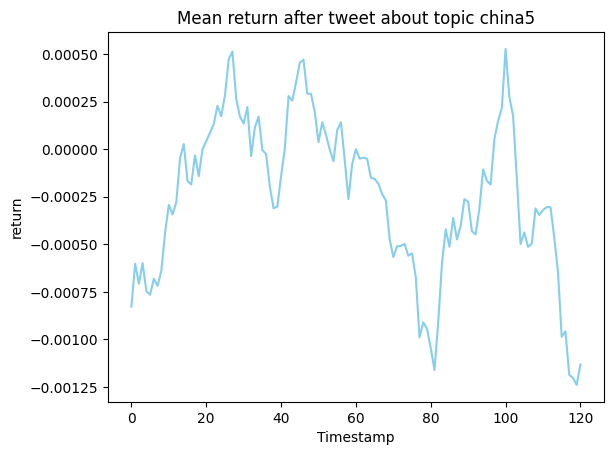

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_volume_histogram_mean_topic_month(dictionary_file, csv_file, target_array, month):
    # CSV 파일을 읽습니다.
    df = pd.read_csv(csv_file)
    df_dict = pd.read_csv(dictionary_file)
    df_topic = pd.read_csv('topic_list.csv', header = None)

    first_row = target_array

    df_dict = df_dict[df_dict.iloc[:,0].isin(first_row)]
  # 결과를 CSV 파일로 저장합니다. 전치를 적용하여 열로 데이터를 저장합니다.

    df.set_index('id', inplace=True)
    ids_to_keep = df_dict.iloc[:, 1].tolist()
    target_rows = df.loc[ids_to_keep]
    df.reset_index(drop = False, inplace = True)
    results = {}


    # 배열의 각 정수 데이터를 순회하면서 처리합니다.
    for num in ids_to_keep:
        # 해당 정수를 id로 가지는 행을 찾습니다.
        row = df[df['id'] == num]

        # 특정 월에 해당하는 데이터가 없는 경우 처리
        if row.empty:
            print(f"ID {num}에 해당하는 데이터가 없습니다.")
            continue

        # 해당 행의 timestamp 값을 가져와서 해당 월을 추출합니다.
        timestamp = row.iloc[0]['timestamp']
        month_idx = dt.datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S').month

        # 결과 딕셔너리에 월별로 데이터를 추가합니다.
        if month_idx not in results:
            results[month_idx] = [num]
        else:
            results[month_idx].append(num)

    first_row = results[month]

# 결과를 CSV 파일로 저장합니다. 전치를 적용하여 열로 데이터를 저장합니다.


    df.set_index('id', inplace=True)
    target_rows = df.loc[first_row]



    # 길이가 41이고 모든 원소가 0인 Series를 생성합니다.
    s = pd.Series([0] * 121)

# Series를 DataFrame으로 변환합니다.
    sum_rows = pd.DataFrame(s)


    for index, row in target_rows.iterrows():
        start_index = max(0, index - 60)
        end_index = min(len(df), index + 61)
        for i in range(121):
          sum_rows[0][i] = sum_rows[0][i] + df.loc[start_index:end_index, 'open'][start_index + i]
        price_data = df.loc[start_index:end_index, 'open']
        #print(volume_data)

      # sum_rows = (sum_rows + df.loc[start_index:end_index, 'volume'])/2


    num_data = target_rows.shape[0]
    initial_price = sum_rows[0][60]

    for i in range(121):
      sum_rows[0][i] =(((sum_rows[0][i] -  initial_price)/initial_price))


    plt.bar(range(len(sum_rows)), sum_rows, width=0.5, align='center')
    plt.plot(sum_rows[0].index, sum_rows[0], color='skyblue')

    # # 가로축에 중심 데이터의 timestamp를 라벨로 표시합니다.
    # center_index = len(mean_histogram) // 2
    # center_timestamp = target_rows.iloc[center_index]['timestamp']
    # plt.xticks([center_timestamp], [center_timestamp.strftime('%Y-%m-%d')])

    plt.title('Mean return after tweet about topic china' + str(month))
    plt.xlabel('Timestamp')
    plt.ylabel('return')
    plt.show()

# 사용 예시
dictionary_file_path = 'trump_dictionary.csv'
csv_file_path = 'SPY.csv'  # CSV 파일 경로를 제공하세요.
topic_file_path = ''
china = [139, 140,  511,  519, 620,  876,  995, 1363, 1567, 1634, 1649, 1961, 2059, 2067,
 2560, 2666, 2772, 3059, 3097, 3112, 3356, 3380, 3573, 3574, 3604, 3610, 3666, 3693,
 3694, 3696, 3985, 4413, 4591, 4678, 5075, 5077, 5099, 5106, 5404, 5604, 5723, 5858,
 5864, 5865, 5967, 5974, 6044, 6602, 6967, 6968, 6969, 7146, 7148, 7258, 7672, 7679,
 7734, 7852, 8421, 8603, 8752, 8861, 8868, 9078, 9310, 9413]
coronavirus =  [139, 727,  770,  872,  874,  993,  995, 1039, 1040, 1078, 1085, 1092, 1097, 1118,
 1148, 1160, 1166, 1170, 1171, 1175, 1176, 1177, 1185, 1209, 1212, 1213, 1318, 1321,
 1382, 1442, 1565, 1574, 1578, 1640, 1772, 1786, 1790, 1936, 1942, 1975, 1994, 2054,
 2055, 2059, 2062, 2202, 2399, 2431, 2437, 2442, 2444, 2445, 2550, 2561, 2562, 2564,
 2570, 2635, 2759, 2771, 2801, 2996, 2998, 3065, 3276, 3665, 3666, 4033, 4039, 4052,
 4053, 4057, 4062, 4074, 4078, 4079, 4112, 4678, 4842, 5326, 5589, 5687, 7146, 7890]

plot_volume_histogram_mean_topic_month(dictionary_file_path, csv_file_path, coronavirus, 5)


                 timestamp    open    high     low   close   volume
id                                                                 
1623   2020-02-07 10:32:00  28.486  28.502  28.437  28.464    41757
4261   2020-02-18 15:30:00  28.444  28.461  28.400  28.427   115132
5426   2020-02-21 15:25:00  28.283  28.309  28.243  28.275    81326
7617   2020-03-02 12:56:00  25.086  25.145  25.070  25.125   862726
8965   2020-03-05 15:54:00  24.278  24.316  24.215  24.256  1045417
12186  2020-03-18 11:47:00  17.655  17.720  17.644  17.713   209147
13381  2020-03-23 12:26:00  16.515  16.588  16.505  16.540   207669
14030  2020-03-25 10:15:00  18.047  18.102  18.031  18.058   215179
14121  2020-03-25 11:46:00  18.529  18.539  18.481  18.513   158378
17830  2020-04-07 15:05:00  20.015  20.076  19.988  20.035    63225
24483  2020-05-01 15:28:00  20.456  20.480  20.438  20.462    58178
26965  2020-05-12 11:20:00  20.108  20.127  20.086  20.119    15062
27549  2020-05-13 14:34:00  19.162  19.175  19.1

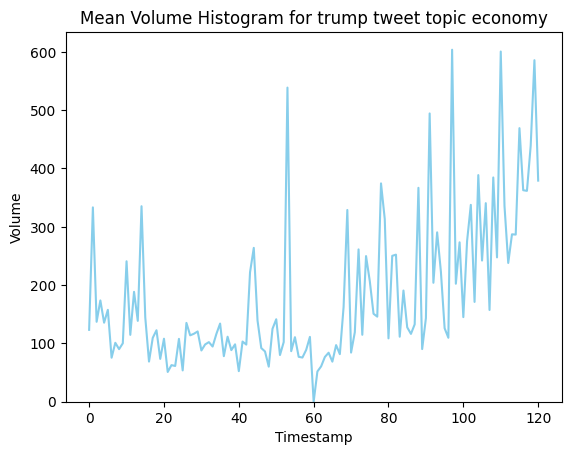

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_volume_histogram_mean_topic_month(dictionary_file, csv_file, target_array):
    # CSV 파일을 읽습니다.
    df = pd.read_csv(csv_file)
    df_dict = pd.read_csv(dictionary_file)
    df_topic = pd.read_csv('topic_list.csv', header = None)

    first_row = target_array

    df_dict = df_dict[df_dict.iloc[:,0].isin(first_row)]
  # 결과를 CSV 파일로 저장합니다. 전치를 적용하여 열로 데이터를 저장합니다.

    df.set_index('id', inplace=True)
    ids_to_keep = df_dict.iloc[:, 1].tolist()
    target_rows = df.loc[ids_to_keep]
    df.reset_index(drop = False, inplace = True)


# 결과를 CSV 파일로 저장합니다. 전치를 적용하여 열로 데이터를 저장합니다.


    # 길이가 41이고 모든 원소가 0인 Series를 생성합니다.
    s = pd.Series([0] * 121)

# Series를 DataFrame으로 변환합니다.
    sum_rows = pd.DataFrame(s)



    # 각 행 주변의 20개 행을 선택하고 volume 데이터를 히스토그램으로 나타냅니다.
    for index, row in target_rows.iterrows():
        start_index = max(0, index - 60)
        end_index = min(len(df), index + 61)
        for i in range(121):
          sum_rows[0][i] = sum_rows[0][i] + (((df.loc[start_index:end_index, 'volume'][start_index + i] / df.loc[start_index:end_index, 'volume'][start_index + 60])*100) - 100)
          if :
            print(sum_rows[0][i])
            print(start_index+i)
            print(df.loc[start_index:end_index, 'volume'][start_index + i])
        volume_data = df.loc[start_index:end_index, 'volume']



      # sum_rows = (sum_rows + df.loc[start_index:end_index, 'volume'])/2

    num_data = target_rows.shape[0]
    initial_volume = sum_rows[0][0]

    for i in range(121):
      sum_rows[0][i] = sum_rows[0][i] / num_data

    # 히스토그램들의 평균을 계산합니다.

    plt.bar(range(len(sum_rows)), sum_rows, width=0.5, align='center')
    plt.plot(sum_rows[0].index, sum_rows[0], color='skyblue')

    # # 가로축에 중심 데이터의 timestamp를 라벨로 표시합니다.
    # center_index = len(mean_histogram) // 2
    # center_timestamp = target_rows.iloc[center_index]['timestamp']
    # plt.xticks([center_timestamp], [center_timestamp.strftime('%Y-%m-%d')])

    plt.title('Mean Volume Histogram for trump tweet topic economy')
    plt.xlabel('Timestamp')
    plt.ylabel('Volume')
    plt.show()

# 사용 예시
dictionary_file_path = 'trump_dictionary.csv'
csv_file_path = 'XLF.csv'  # CSV 파일 경로를 제공하세요.
topic_file_path = ''
china = [139, 140,  511,  519, 620,  876,  995, 1363, 1567, 1634, 1649, 1961, 2059, 2067,
 2560, 2666, 2772, 3059, 3097, 3112, 3356, 3380, 3573, 3574, 3604, 3610, 3666, 3693,
 3694, 3696, 3985, 4413, 4591, 4678, 5075, 5077, 5099, 5106, 5404, 5604, 5723, 5858,
 5864, 5865, 5967, 5974, 6044, 6602, 6967, 6968, 6969, 7146, 7148, 7258, 7672, 7679,
 7734, 7852, 8421, 8603, 8752, 8861, 8868, 9078, 9310, 9413]
coronavirus =  [139, 727,  770,  872,  874,  993,  995, 1039, 1040, 1078, 1085, 1092, 1097, 1118,
 1148, 1160, 1166, 1170, 1171, 1175, 1176, 1177, 1185, 1209, 1212, 1213, 1318, 1321,
 1382, 1442, 1565, 1574, 1578, 1640, 1772, 1786, 1790, 1936, 1942, 1975, 1994, 2054,
 2055, 2059, 2062, 2202, 2399, 2431, 2437, 2442, 2444, 2445, 2550, 2561, 2562, 2564,
 2570, 2635, 2759, 2771, 2801, 2996, 2998, 3065, 3276, 3665, 3666, 4033, 4039, 4052,
 4053, 4057, 4062, 4074, 4078, 4079, 4112, 4678, 4842, 5326, 5589, 5687, 7146, 7890]
plot_volume_histogram_mean_topic_month(dictionary_file_path, csv_file_path, china)


                 timestamp     open     high      low    close   volume
id                                                                     
6371   2020-02-26 11:40:00  297.974  298.164  297.571  297.839   121152
7593   2020-03-02 12:32:00  284.376  284.632  284.153  284.485  1287344
8882   2020-03-05 14:31:00  283.297  283.702  282.914  283.330   231623
8965   2020-03-05 15:54:00  284.020  284.237  282.998  283.321  1497980
9340   2020-03-06 15:39:00  276.066  276.291  274.974  275.237   912826
9349   2020-03-06 15:48:00  277.033  277.221  276.335  276.993   540727
9458   2020-03-09 11:21:00  263.812  264.193  263.318  263.492   282402
9569   2020-03-09 13:12:00  262.929  263.117  262.540  262.835   185954
9665   2020-03-09 14:48:00  258.534  258.894  257.702  257.878   789026
10052  2020-03-10 14:45:00  264.807  264.972  264.332  264.807   397196
10419  2020-03-11 14:22:00  257.417  257.514  257.003  257.184   288969
10528  2020-03-12 09:55:00  236.279  238.315  235.521  238.088  

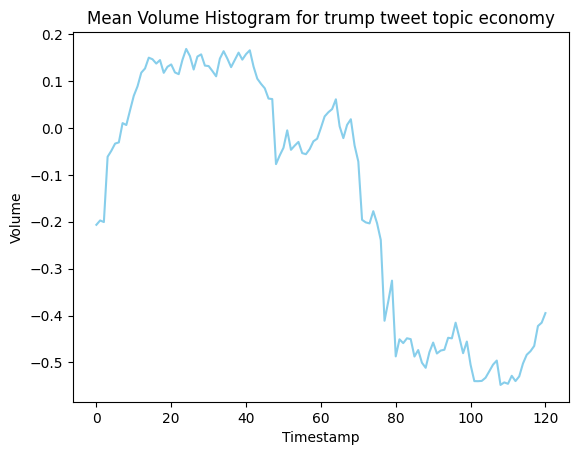

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_volume_histogram_mean_topic_month(dictionary_file, csv_file, target_array):
    # CSV 파일을 읽습니다.
    df = pd.read_csv(csv_file)
    df_dict = pd.read_csv(dictionary_file)
    df_topic = pd.read_csv('topic_list.csv', header = None)

    first_row = target_array

    df_dict = df_dict[df_dict.iloc[:,0].isin(first_row)]
  # 결과를 CSV 파일로 저장합니다. 전치를 적용하여 열로 데이터를 저장합니다.

    df.set_index('id', inplace=True)
    ids_to_keep = df_dict.iloc[:, 1].tolist()
    target_rows = df.loc[ids_to_keep]
    df.reset_index(drop = False, inplace = True)


# 결과를 CSV 파일로 저장합니다. 전치를 적용하여 열로 데이터를 저장합니다.



    print(target_rows)

    # 길이가 41이고 모든 원소가 0인 Series를 생성합니다.
    s = pd.Series([0] * 121)

# Series를 DataFrame으로 변환합니다.
    sum_rows = pd.DataFrame(s)



    # 각 행 주변의 20개 행을 선택하고 volume 데이터를 히스토그램으로 나타냅니다.

    for index, row in target_rows.iterrows():
        start_index = max(0, index - 60)
        end_index = min(len(df), index + 61)
        for i in range(121):
          sum_rows[0][i] = sum_rows[0][i] + (((df.loc[start_index:end_index, 'open'][start_index + i] / df.loc[start_index:end_index, 'open'][start_index + 60])*100) - 100)
        price_data = df.loc[start_index:end_index, 'open']

    print(df.loc[[]])



      # sum_rows = (sum_rows + df.loc[start_index:end_index, 'volume'])/2

    num_data = target_rows.shape[0]
    initial_volume = sum_rows[0][0]

    for i in range(121):
      sum_rows[0][i] = sum_rows[0][i] / num_data

    # 히스토그램들의 평균을 계산합니다.

    plt.bar(range(len(sum_rows)), sum_rows, width=0.5, align='center')
    plt.plot(sum_rows[0].index, sum_rows[0], color='skyblue')

    # # 가로축에 중심 데이터의 timestamp를 라벨로 표시합니다.
    # center_index = len(mean_histogram) // 2
    # center_timestamp = target_rows.iloc[center_index]['timestamp']
    # plt.xticks([center_timestamp], [center_timestamp.strftime('%Y-%m-%d')])

    plt.title('Mean Volume Histogram for trump tweet topic economy')
    plt.xlabel('Timestamp')
    plt.ylabel('Volume')
    plt.show()

# 사용 예시
dictionary_file_path = 'trump_dictionary.csv'
csv_file_path = 'SPY.csv'  # CSV 파일 경로를 제공하세요.
topic_file_path = ''
china = [139, 140,  511,  519, 620,  876,  995, 1363, 1567, 1634, 1649, 1961, 2059, 2067,
 2560, 2666, 2772, 3059, 3097, 3112, 3356, 3380, 3573, 3574, 3604, 3610, 3666, 3693,
 3694, 3696, 3985, 4413, 4591, 4678, 5075, 5077, 5099, 5106, 5404, 5604, 5723, 5858,
 5864, 5865, 5967, 5974, 6044, 6602, 6967, 6968, 6969, 7146, 7148, 7258, 7672, 7679,
 7734, 7852, 8421, 8603, 8752, 8861, 8868, 9078, 9310, 9413]
coronavirus =  [139, 727,  770,  872,  874,  993,  995, 1039, 1040, 1078, 1085, 1092, 1097, 1118,
 1148, 1160, 1166, 1170, 1171, 1175, 1176, 1177, 1185, 1209, 1212, 1213, 1318, 1321,
 1382, 1442, 1565, 1574, 1578, 1640, 1772, 1786, 1790, 1936, 1942, 1975, 1994, 2054,
 2055, 2059, 2062, 2202, 2399, 2431, 2437, 2442, 2444, 2445, 2550, 2561, 2562, 2564,
 2570, 2635, 2759, 2771, 2801, 2996, 2998, 3065, 3276, 3665, 3666, 4033, 4039, 4052,
 4053, 4057, 4062, 4074, 4078, 4079, 4112, 4678, 4842, 5326, 5589, 5687, 7146, 7890]
plot_volume_histogram_mean_topic_month(dictionary_file_path, csv_file_path, coronavirus)


Aggregated Chart (+_ 60 min)

{2: [621], 3: [11148, 12133], 6: [32803, 32803, 33635], 7: [44163, 47784, 47784, 48059, 48560], 8: [49747, 52472, 54036, 54301], 9: [59429, 60606, 60611, 61719, 63284], 10: [66343, 68574, 68581, 68726, 69301, 71234]}
{2: [621], 3: [11148, 12133], 6: [32803, 32803, 33635], 7: [44163, 47784, 47784, 48059, 48560], 8: [49747, 52472, 54036, 54301], 9: [59429, 60606, 60611, 61719, 63284], 10: [66343, 68574, 68581, 68726, 69301, 71234]}
{2: [621], 3: [11148, 12133], 6: [32803, 32803, 33635], 7: [44163, 47784, 47784, 48059, 48560], 8: [49747, 52472, 54036, 54301], 9: [59429, 60606, 60611, 61719, 63284], 10: [66343, 68574, 68581, 68726, 69301, 71234]}
{2: [621], 3: [11148, 12133], 6: [32803, 32803, 33635], 7: [44163, 47784, 47784, 48059, 48560], 8: [49747, 52472, 54036, 54301], 9: [59429, 60606, 60611, 61719, 63284], 10: [66343, 68574, 68581, 68726, 69301, 71234]}
{2: [621], 3: [11148, 12133], 6: [32803, 32803, 33635], 7: [44163, 47784, 47784, 48059, 48560], 8: [49747, 52472, 54036, 54301], 9: 

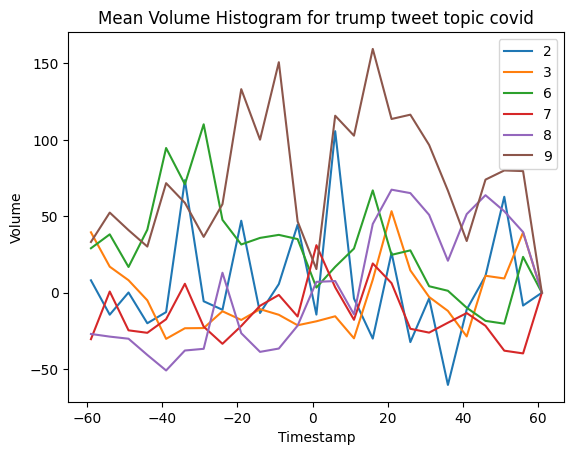

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_volume_histogram_mean_topic_month(dictionary_file, csv_file, target_array):

    for i in range(8):

        if (i + 2) == 4 or (i+2) == 5:
          continue

        df = pd.read_csv(csv_file)
        df_dict = pd.read_csv(dictionary_file)

        first_row = target_array


        df_dict = df_dict[df_dict.iloc[:,0].isin(first_row)]
        df.set_index('id', inplace=True)
        ids_to_keep = df_dict.iloc[:, 1].tolist()
        target_rows = df.loc[ids_to_keep]
        df.reset_index(drop = False, inplace = True)
        results = {}
        month = i + 2

        for num in ids_to_keep:
        # 해당 정수를 id로 가지는 행을 찾습니다.
          row = df[df['id'] == num]

        # 특정 월에 해당하는 데이터가 없는 경우 처리
          if row.empty:
              print(f"ID {num}에 해당하는 데이터가 없습니다.")
              continue

        # 해당 행의 timestamp 값을 가져와서 해당 월을 추출합니다.
          timestamp = row.iloc[0]['timestamp']
          month_idx = dt.datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S').month

        # 결과 딕셔너리에 월별로 데이터를 추가합니다.
          if month_idx not in results:
            results[month_idx] = [num]
          else:
            results[month_idx].append(num)
        print(results)
        first_row = results[month]
        df_dict = df_dict[df_dict.iloc[:,0].isin(first_row)]


# 결과를 CSV 파일로 저장합니다. 전치를 적용하여 열로 데이터를 저장합니다.


        df.set_index('id', inplace=True)
        target_rows = df.loc[first_row]

    # 길이가 41이고 모든 원소가 0인 Series를 생성합니다.
        s = pd.Series([0] * 121)
        a = pd.Series([0] * 25)

# Series를 DataFrame으로 변환합니다.
        sum_rows = pd.DataFrame(s)
        sum_avg_rows = pd.DataFrame(a)



    # 각 행 주변의 20개 행을 선택하고 volume 데이터를 히스토그램으로 나타냅니다.
        for index, row in target_rows.iterrows():
            start_index = max(0, index - 60)
            end_index = min(len(df), index + 61)
            for i in range(121):
              sum_rows[0][i] = sum_rows[0][i] + (((df.loc[start_index:end_index, 'volume'][start_index + i] / df.loc[start_index:end_index, 'volume'][start_index + 60])*100) - 100)
              if (i+1) % 5 == 0:
                sum_avg_rows[0][((i+1)/5) - 1] = (sum_rows[0][i] + sum_rows[0][i-1] + sum_rows[0][i-2] + sum_rows[0][i-3] + sum_rows[0][i-4]) / 5








      # sum_rows = (sum_rows + df.loc[start_index:end_index, 'volume'])/2

        num_data = target_rows.shape[0]
        initial_volume = sum_rows[0][0]

        for i in range(121):
          sum_rows[0][i] = sum_rows[0][i] / num_data

        for i in range(25):
          sum_avg_rows[0][i] = sum_avg_rows[0][i]/num_data


    # 히스토그램들의 평균을 계산합니다.

        #plt.plot(sum_rows[0].index - 60, sum_rows[0], color='skyblue')
        plt.plot(((sum_avg_rows[0].index * 5) + 1) - 60, sum_avg_rows[0], label = month)


    # # 가로축에 중심 데이터의 timestamp를 라벨로 표시합니다.
    # center_index = len(mean_histogram) // 2
    # center_timestamp = target_rows.iloc[center_index]['timestamp']
    # plt.xticks([center_timestamp], [center_timestamp.strftime('%Y-%m-%d')])

    plt.title('Mean Volume Histogram for trump tweet topic covid')
    plt.xlabel('Timestamp')
    plt.ylabel('Volume')
    plt.legend()
    plt.show()

# 사용 예시
dictionary_file_path = 'trump_dictionary.csv'
csv_file_path = 'SPY.csv'  # CSV 파일 경로를 제공하세요.
topic_file_path = ''
china = [139, 140,  511,  519, 620,  876,  995, 1363, 1567, 1634, 1649, 1961, 2059, 2067,
 2560, 2666, 2772, 3059, 3097, 3112, 3356, 3380, 3573, 3574, 3604, 3610, 3666, 3693,
 3694, 3696, 3985, 4413, 4591, 4678, 5075, 5077, 5099, 5106, 5404, 5604, 5723, 5858,
 5864, 5865, 5967, 5974, 6044, 6602, 6967, 6968, 6969, 7146, 7148, 7258, 7672, 7679,
 7734, 7852, 8421, 8603, 8752, 8861, 8868, 9078, 9310, 9413]
coronavirus =  [139, 727,  770,  872,  874,  993,  995, 1039, 1040, 1078, 1085, 1092, 1097, 1118,
 1148, 1160, 1166, 1170, 1171, 1175, 1176, 1177, 1185, 1209, 1212, 1213, 1318, 1321,
 1382, 1442, 1565, 1574, 1578, 1640, 1772, 1786, 1790, 1936, 1942, 1975, 1994, 2054,
 2055, 2059, 2062, 2202, 2399, 2431, 2437, 2442, 2444, 2445, 2550, 2561, 2562, 2564,
 2570, 2635, 2759, 2771, 2801, 2996, 2998, 3065, 3276, 3665, 3666, 4033, 4039, 4052,
 4053, 4057, 4062, 4074, 4078, 4079, 4112, 4678, 4842, 5326, 5589, 5687, 7146, 7890]
covid_related = [770, 772, 868, 871, 872, 874, 1039, 1040, 1085, 1092, 1108, 1160, 1165, 1166, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1180, 1181, 1184, 1185, 1186, 1187, 1188, 1189, 1207, 1209, 1213, 1316, 1318, 1321, 1382, 1442, 1562, 1573, 1574, 1578, 1619, 1772, 1786, 1790, 1936, 1945, 2054, 2055, 2062, 2065, 2399, 2434, 2550, 2562, 2564, 2570, 2771, 2801, 2804, 2996, 3106, 3276, 3665, 3843, 4033, 4039, 4040, 4052, 4059, 4074, 4079, 4090, 4104, 4112, 4117, 4139, 4409, 4842, 5223, 5285, 5326, 5403, 5447, 5472, 5589, 5687, 7678, 7888, 7889, 7890, 7892, 8416, 8532, 8539]
healthcare = [68, 1211, 1361, 3901, 3902, 4072, 5282, 5657, 5658, 5692, 5726, 5887, 6086, 6392, 6414, 7316, 7566, 7569, 7692, 7887, 8327, 8668, 8670, 8771, 8815, 9088]
plot_volume_histogram_mean_topic_month(dictionary_file_path, csv_file_path, healthcare)


Aggregated Chart (+60 min)

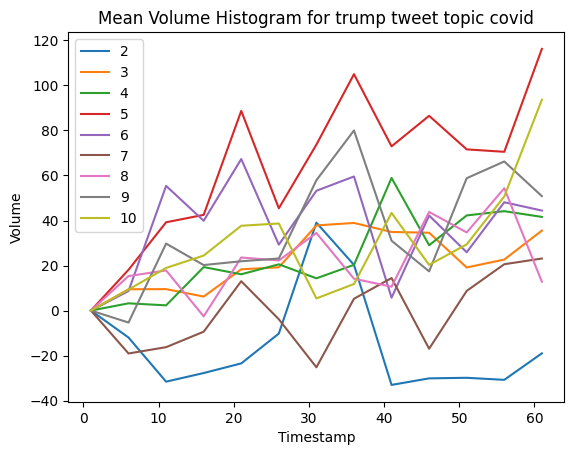

In [ ]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_volume_histogram_mean_topic_month(dictionary_file, csv_file, target_array):

    for i in range(9):

        # if (i + 2) == 4 or (i+2) == 5:
        #   continue

        df = pd.read_csv(csv_file)
        df_dict = pd.read_csv(dictionary_file)

        first_row = target_array


        df_dict = df_dict[df_dict.iloc[:,0].isin(first_row)]
        df.set_index('id', inplace=True)
        ids_to_keep = df_dict.iloc[:, 1].tolist()
        target_rows = df.loc[ids_to_keep]
        df.reset_index(drop = False, inplace = True)
        results = {}
        month = i + 2

        for num in ids_to_keep:
        # 해당 정수를 id로 가지는 행을 찾습니다.
          row = df[df['id'] == num]

        # 특정 월에 해당하는 데이터가 없는 경우 처리
          if row.empty:
              print(f"ID {num}에 해당하는 데이터가 없습니다.")
              continue

        # 해당 행의 timestamp 값을 가져와서 해당 월을 추출합니다.
          timestamp = row.iloc[0]['timestamp']
          month_idx = dt.datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S').month

        # 결과 딕셔너리에 월별로 데이터를 추가합니다.
          if month_idx not in results:
            results[month_idx] = [num]
          else:
            results[month_idx].append(num)
        first_row = results[month]
        df_dict = df_dict[df_dict.iloc[:,0].isin(first_row)]


# 결과를 CSV 파일로 저장합니다. 전치를 적용하여 열로 데이터를 저장합니다.


        df.set_index('id', inplace=True)
        target_rows = df.loc[first_row]

    # 길이가 41이고 모든 원소가 0인 Series를 생성합니다.
        s = pd.Series([0] * 61)
        a = pd.Series([0] * 13)

# Series를 DataFrame으로 변환합니다.
        sum_rows = pd.DataFrame(s)
        sum_avg_rows = pd.DataFrame(a)



    # 각 행 주변의 20개 행을 선택하고 volume 데이터를 히스토그램으로 나타냅니다.
        for index, row in target_rows.iterrows():
            start_index = max(0, index)
            end_index = min(len(df), index + 61)
            for i in range(61):
              sum_rows[0][i] = sum_rows[0][i] + (((df.loc[start_index:end_index, 'volume'][start_index + i] / df.loc[start_index:end_index, 'volume'][start_index])*100) - 100)
              if (i+1) % 5 == 0:
                sum_avg_rows[0][((i+1)/5)] = (sum_rows[0][i] + sum_rows[0][i-1] + sum_rows[0][i-2] + sum_rows[0][i-3] + sum_rows[0][i-4]) / 5


      # sum_rows = (sum_rows + df.loc[start_index:end_index, 'volume'])/2

        num_data = target_rows.shape[0]
        initial_volume = sum_rows[0][0]

        for i in range(61):
          sum_rows[0][i] = sum_rows[0][i] / num_data

        for i in range(13):
          sum_avg_rows[0][i] = sum_avg_rows[0][i]/num_data


    # 히스토그램들의 평균을 계산합니다.

        #plt.plot(sum_rows[0].index - 60, sum_rows[0], color='skyblue')
        plt.plot(((sum_avg_rows[0].index * 5) + 1), sum_avg_rows[0], label = month)


    # # 가로축에 중심 데이터의 timestamp를 라벨로 표시합니다.
    # center_index = len(mean_histogram) // 2
    # center_timestamp = target_rows.iloc[center_index]['timestamp']
    # plt.xticks([center_timestamp], [center_timestamp.strftime('%Y-%m-%d')])

    plt.title('Mean Volume Histogram for trump tweet topic covid')
    plt.xlabel('Timestamp')
    plt.ylabel('Volume')
    plt.legend()
    plt.show()

# 사용 예시
dictionary_file_path = 'trump_dictionary.csv'
csv_file_path = 'SPY.csv'  # CSV 파일 경로를 제공하세요.

plot_volume_histogram_mean_topic_month(dictionary_file_path, csv_file_path, china)


                                                   text isRetweet isDeleted  \
id                                                                            
139   Just had a long and very good conversation by ...         f         f   
140   ....he will be successful, especially as the w...         f         f   
509   The United States cannot, &amp; will not, beco...         f         t   
511   ....product and goods to China and other count...         f         t   
516   The United States cannot, &amp; will not, beco...         f         f   
...                                                 ...       ...       ...   
8901  RT @Jim_Jordan: Twitter censors @JudiciaryGOP....         t         f   
9310  We have made tremendous progress with the Chin...         f         f   
9413  Death rate of people going into hospitals is M...         f         f   
9539  More Testing equals more Cases. We have best t...         f         f   
9540  The @nytimes now admits that patients ill with

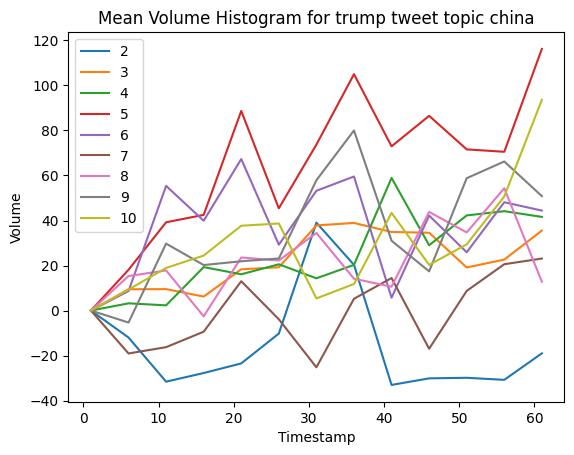

                                                   text isRetweet isDeleted  \
id                                                                            
167   RT @marcorubio: Last night at the #SOTU2020 tw...         t         f   
590   RT @PressSec: Earlier today, President @realDo...         t         f   
620   IF OUR FORMALLY TARGETED FARMERS NEED ADDITION...         f         f   
689   मैं  इसी  लिए भारत आया हूँ, सद्भावना और प्रेम ...         f         f   
1168  RT @ScottGottliebMD: Governments across the U....         t         f   
...                                                 ...       ...       ...   
7978  RT @HeyTammyBruce: 😐 Husband of Sen. Dianne Fe...         t         f   
8742  RT @ACTBrigitte: If a contractor took 47 years...         t         f   
8751  RT @TheBabylonBee: California Mandates All Foo...         t         f   
8921  RT @village_jordan: @RandPaul @realDonaldTrump...         t         t   
9406  RT @KerriKupecDOJ: This is an impressive repor

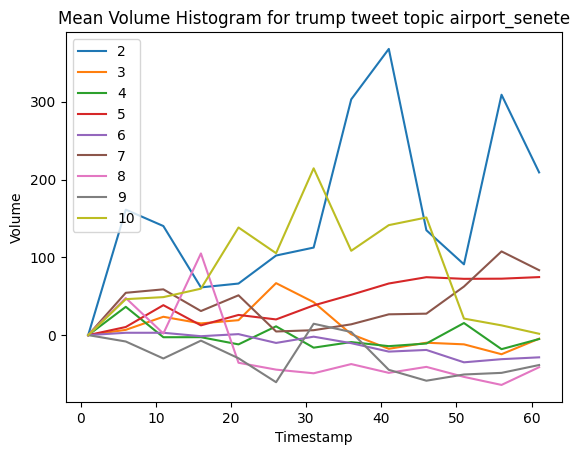

                                                   text isRetweet isDeleted  \
id                                                                            
770   Just landed. India was great, trip very succes...         f         f   
772   I will be having a News Conference at the Whit...         f         f   
868   RT @HealthyFla: Florida has 2 presumptive posi...         t         f   
871   I am meeting with the major pharmaceutical com...         f         f   
872   RT @WHOWPRO: This is how you can reduce your r...         t         f   
...                                                 ...       ...       ...   
7890  RT @spectatorindex: JUST IN: Johnson &amp; Joh...         t         f   
7892  White House News Conference today at 6:00 P.M....         f         f   
8416  RT @HerschelWalker: One death is two many BUT ...         t         f   
8532  RT @NHC_Atlantic: Here are the 10 AM CDT Key M...         t         f   
8539  Covid Relief Negotiations are moving along. Go

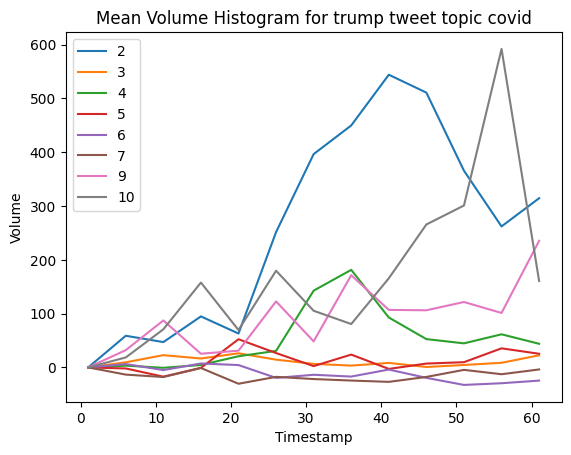

                                                   text isRetweet isDeleted  \
id                                                                            
84    Market up big today on very good economic news...         f         f   
358   New Stock Market RECORD. Congratulations, spen...         f         f   
559            Highest Stock Market In History, By Far!         f         f   
589   RT @PressSec: Arizona is BOOMING thanks to Pre...         t         f   
878   As usual, Jay Powell and the Federal Reserve a...         f         f   
...                                                 ...       ...       ...   
9069  “Stock Markets will hit new highs if President...         f         f   
9087  Remember, BIDEN is going to raise your taxes a...         f         f   
9463  As a developer long ago, and continuing to thi...         f         f   
9500  GDP number just announced. Biggest and Best in...         f         f   
9862  Jobless Claims Dip to 751,000, Lowest Since Ma

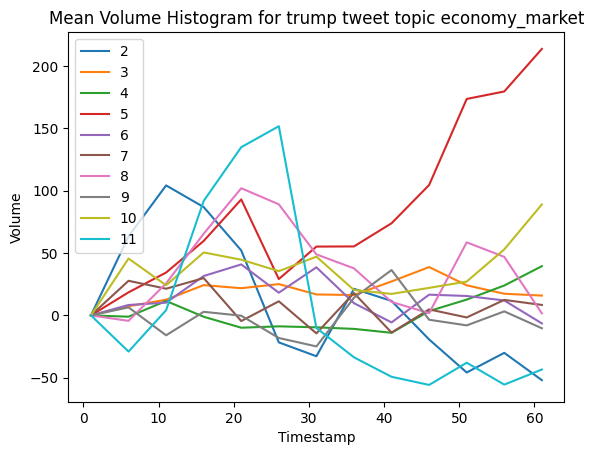

                                                   text isRetweet isDeleted  \
id                                                                            
88    It was a great and triumphant evening for our ...         f         f   
355                        BEST USA ECONOMY IN HISTORY!         f         f   
489                              HAPPY PRESIDENT’S DAY!         f         f   
512         ....THE UNITED STATES IS OPEN FOR BUSINESS!         f         t   
513         ....THE UNITED STATES IS OPEN FOR BUSINESS!         f         t   
...                                                 ...       ...       ...   
9389                          MAKE AMERICA GREAT AGAIN!         f         f   
9397  Thank you to the most incredible people on ear...         f         f   
9412  Thank you very much to the great @WashTimes fo...         f         f   
9416  Thank you to the Boston Herald. A great honor!...         f         f   
9542  33.1% GDP - BEST IN USA HISTORY. IF I AM ELECT

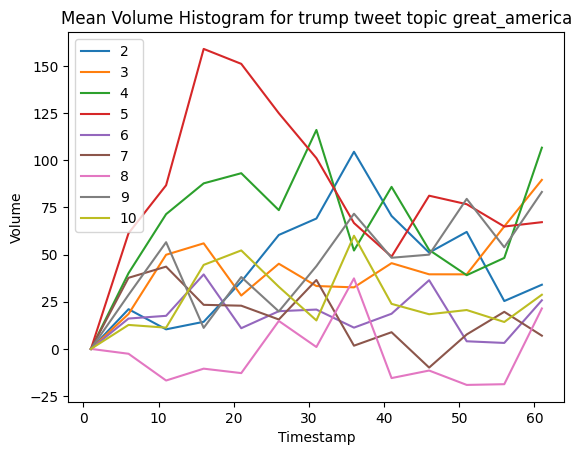

                                                   text isRetweet isDeleted  \
id                                                                            
145   RT @RepMarkMeadows: Greatest, bravest military...         t         f   
146   RT @RepLeeZeldin: This is a really bad time to...         t         f   
148   RT @RepMattGaetz: On Sunday, Qasim al-Rimi, a ...         t         f   
622   RT @SecPompeo: After decades of conflict, we h...         t         f   
623   RT @statedeptspox: .@SecPompeo announced that ...         t         f   
624   RT @LucasFoxNews: Sr. State Dept. official: Th...         t         f   
625   RT @SecKermani: The week long "Reduction in Vi...         t         f   
626   RT @RFERL: A week-long "reduction in violence"...         t         f   
731   RT @PMOIndia: यह संबंध, 21वीं सदी की सबसे महत्...         t         f   
1554  We will be guided by the wishes of Prime Minis...         f         f   
1635  RT @JPN_PMO: After his telephone talks with IO

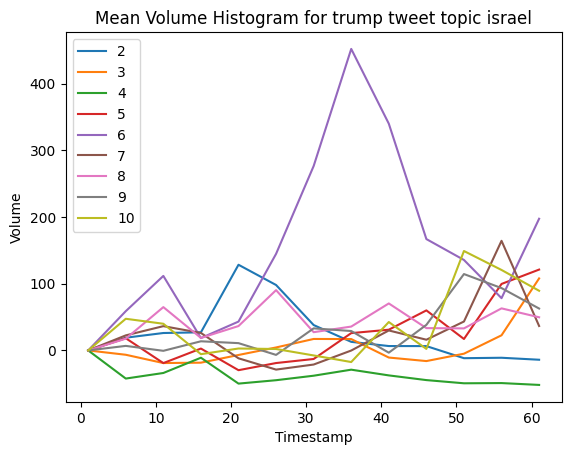

                                                   text isRetweet isDeleted  \
id                                                                            
1822  “The States have to get the money to the peopl...         f         f   
1973  “The number of New Yorkers admitted to hospita...         f         f   
2595  Really? Have you looked at the numbers lately!...         f         f   
2820  I will be interviewed on @foxandfriends at 8:0...         f         f   
3305  .@foxandfriends trounces Morning Psycho (MSDNC...         f         f   
4141      THESE NUMBERS ARE INCREDIBLE! @MariaBartiromo         f         f   
4142  I am so stunned. I’ve never seen numbers like ...         f         f   
4143  This is an AMAZING JOBS REPORT! Edward Lawrenc...         f         f   
4147  It’s a stupendous number. It’s joyous, let’s c...         f         f   
4148  It is a stunner by any stretch of the imaginat...         f         f   
4418  Interview with @HARRISFAULKNER at 1:00 P.M. on

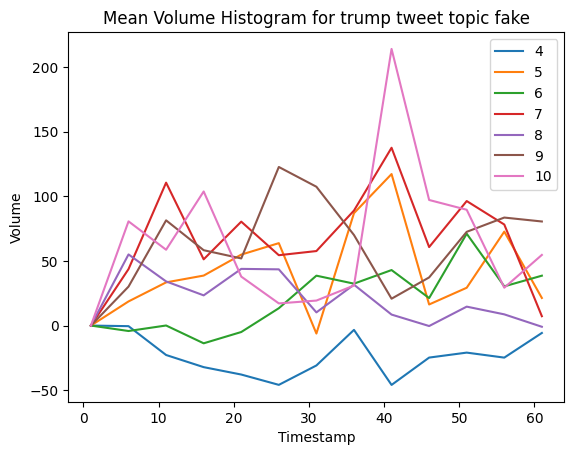

                                                   text isRetweet isDeleted  \
id                                                                            
68    RT @guypbenson: “No, but seriously, let us run...         t         f   
1211  The Federal Reserve must FINALLY lower the Fed...         f         f   
1361  I will totally protect your Medicare &amp; Soc...         f         f   
3901  RT @MikeCrapo: This fall, many Medicare Advant...         t         f   
3902  RT @MikeCrapo: I introduced the Lower Costs, M...         t         t   
4072  RT @MikeCrapo: I introduced the Lower Costs, M...         t         f   
5282  .@GoyaFoods is doing GREAT. The Radical Left s...         f         f   
5657  Big Pharma is taking television ads trying to ...         f         f   
5658  ....be able to produce what I have. So when yo...         f         f   
5692  RT @realDonaldTrump: Big Pharma is taking tele...         t         f   
5726  Drug prices will soon be lowered massively. Bi

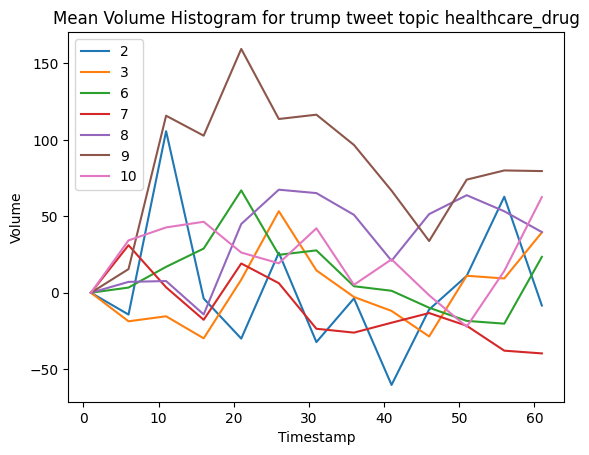

                                                   text isRetweet isDeleted  \
id                                                                            
510   ....I have seen some of the regulations being ...         f         t   
514   ....I have seen some of the regulations being ...         f         t   
518   ....I have seen some of the regulations being ...         f         f   
1107  Going up fast. We need the Wall more than ever...         f         f   
1169  RT @NBCNewsNow: JUST IN: US Supreme Court: Tru...         t         f   
1212  To this point, and because we have had a very ...         f         f   
1368  We will be, by mutual consent, temporarily clo...         f         f   
1581                       THIS IS WHY WE NEED BORDERS!         f         f   
1641  RT @BreitbartNews: "This crisis has underscore...         t         f   
2379  I will be signing my Executive Order prohibiti...         f         f   
2759  Mexico is sadly experiencing very big CoronaVi

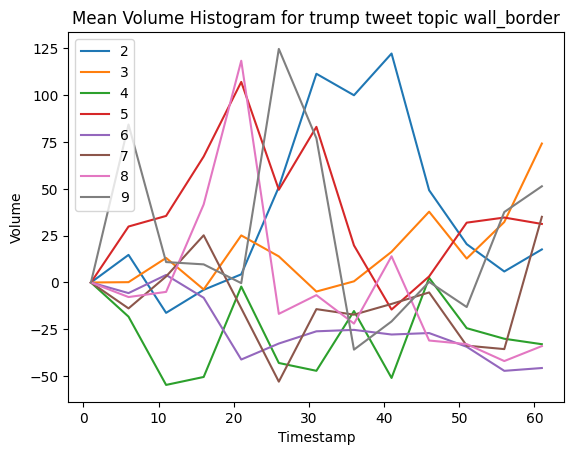

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_aggregated_volume_by_topic(dictionary_file, csv_file):


  for idx in range(len(topic_list)):
    df = pd.read_csv('Trump_election_market_time.csv')
    df.set_index('id', inplace=True)
    rows = df.loc[topic_list[idx]]

    rows['date'] = pd.to_datetime(rows['date'], errors='coerce')

    rows = rows.dropna(subset=['date'])

    rows['month'] = rows['date'].dt.month
    month_counts = rows['month'].value_counts().sort_index()
    rows['neartweet'] = rows.apply(lambda row: rows[(rows['date'] < row['date']) & (rows['date'] >= row['date'] - pd.Timedelta(days=14))].shape[0], axis=1)


    month_counts = month_counts.loc[2:11]
    print(rows)
    target_array = topic_list[idx]
    for i in month_counts.index:

          # if (i + 2) == 4 or (i+2) == 5:
          #   continue

          df = pd.read_csv(csv_file)
          df_dict = pd.read_csv(dictionary_file)

          first_row = target_array


          df_dict = df_dict[df_dict.iloc[:,0].isin(first_row)]
          df.set_index('id', inplace=True)
          ids_to_keep = df_dict.iloc[:, 1].tolist()
          target_rows = df.loc[ids_to_keep]
          df.reset_index(drop = False, inplace = True)
          results = {}
          month = i

          for num in ids_to_keep:
          # 해당 정수를 id로 가지는 행을 찾습니다.
            row = df[df['id'] == num]

          # 특정 월에 해당하는 데이터가 없는 경우 처리
            if row.empty:
                print(f"ID {num}에 해당하는 데이터가 없습니다.")
                continue

          # 해당 행의 timestamp 값을 가져와서 해당 월을 추출합니다.
            timestamp = row.iloc[0]['timestamp']
            month_idx = dt.datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S').month

          # 결과 딕셔너리에 월별로 데이터를 추가합니다.
            if month_idx not in results:
              results[month_idx] = [num]
            else:
              results[month_idx].append(num)
          first_row = results[month]
          df_dict = df_dict[df_dict.iloc[:,0].isin(first_row)]


  # 결과를 CSV 파일로 저장합니다. 전치를 적용하여 열로 데이터를 저장합니다.


          df.set_index('id', inplace=True)
          target_rows = df.loc[first_row]

      # 길이가 41이고 모든 원소가 0인 Series를 생성합니다.
          s = pd.Series([0] * 61)
          a = pd.Series([0] * 13)

  # Series를 DataFrame으로 변환합니다.
          sum_rows = pd.DataFrame(s)
          sum_avg_rows = pd.DataFrame(a)



      # 각 행 주변의 20개 행을 선택하고 volume 데이터를 히스토그램으로 나타냅니다.
          for index, row in target_rows.iterrows():
              start_index = max(0, index)
              end_index = min(len(df), index + 61)
              for i in range(61):
                sum_rows[0][i] = sum_rows[0][i] + (((df.loc[start_index:end_index, 'volume'][start_index + i] / df.loc[start_index:end_index, 'volume'][start_index])*100) - 100)
                if (i+1) % 5 == 0:
                  sum_avg_rows[0][((i+1)/5)] = (sum_rows[0][i] + sum_rows[0][i-1] + sum_rows[0][i-2] + sum_rows[0][i-3] + sum_rows[0][i-4]) / 5


        # sum_rows = (sum_rows + df.loc[start_index:end_index, 'volume'])/2

          num_data = target_rows.shape[0]
          initial_volume = sum_rows[0][0]

          for i in range(61):
            sum_rows[0][i] = sum_rows[0][i] / num_data

          for i in range(13):
            sum_avg_rows[0][i] = sum_avg_rows[0][i]/num_data


      # 히스토그램들의 평균을 계산합니다.

          #plt.plot(sum_rows[0].index - 60, sum_rows[0], color='skyblue')
          plt.plot(((sum_avg_rows[0].index * 5) + 1), sum_avg_rows[0], label = month)
          df.reset_index(drop = False, inplace = True)


      # # 가로축에 중심 데이터의 timestamp를 라벨로 표시합니다.
      # center_index = len(mean_histogram) // 2
      # center_timestamp = target_rows.iloc[center_index]['timestamp']
      # plt.xticks([center_timestamp], [center_timestamp.strftime('%Y-%m-%d')])

    plt.title('Mean Volume Histogram for trump tweet topic ' + topic_name[idx])
    plt.xlabel('Timestamp')
    plt.ylabel('Volume')
    plt.legend()
    plt.show()

dictionary_file_path = 'trump_dictionary.csv'
csv_file_path = 'SPY.csv'  # CSV 파일 경로를 제공하세요.

plot_aggregated_volume_by_topic(dictionary_file_path, csv_file_path)

Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'],
      dtype='object')
[139, 6602]


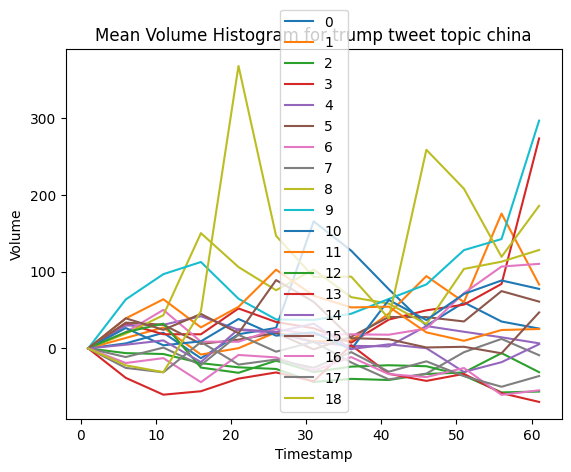

Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'],
      dtype='object')
[167, 1168, 2185, 5590, 7978, 8742]


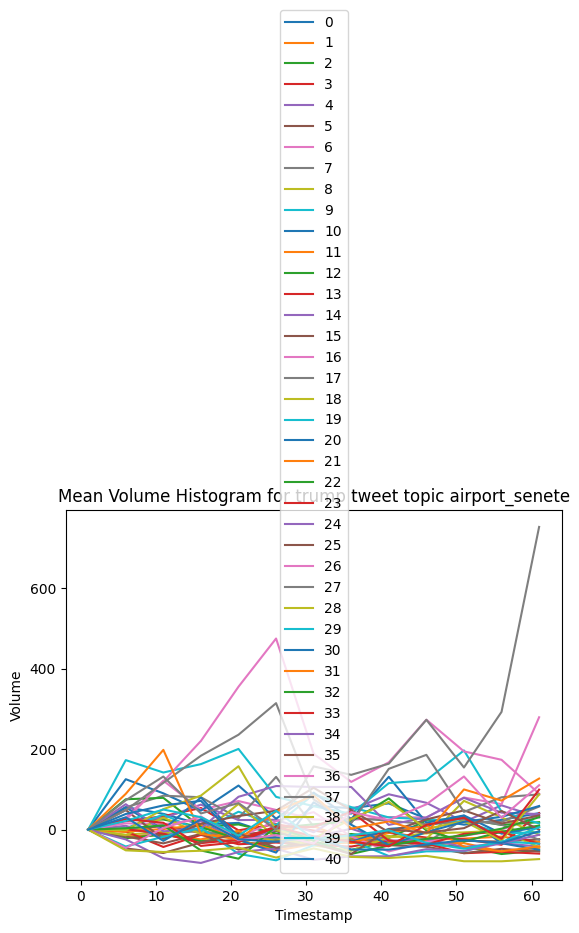

Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'],
      dtype='object')
[770, 4842, 7678]


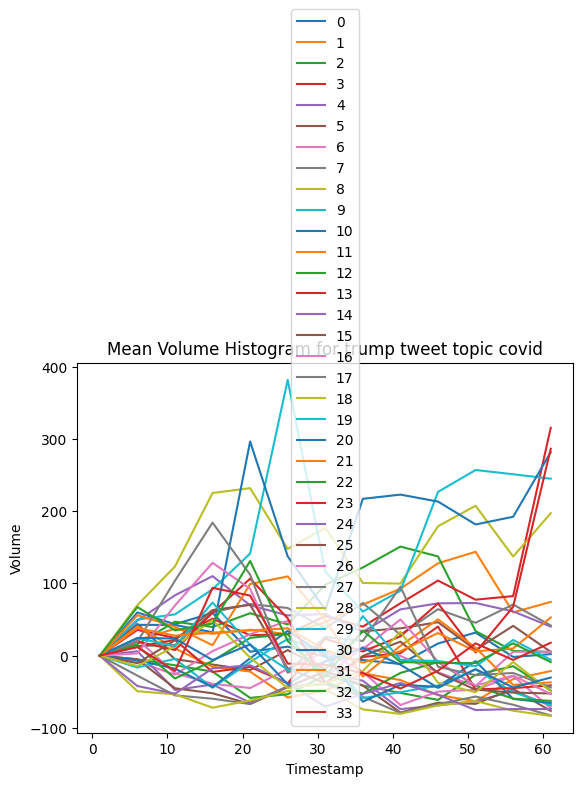

Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'],
      dtype='object')
[84, 4913, 8100, 8101]


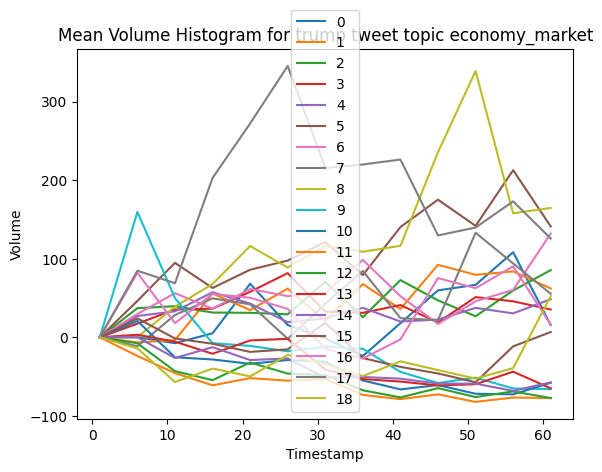

Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'],
      dtype='object')
[88]


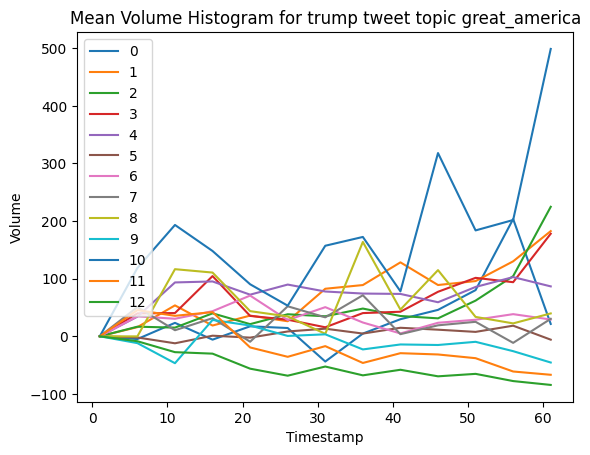

Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'],
      dtype='object')
[145, 622, 1554, 3284, 3996, 3997, 5609, 6090, 7141, 8424, 9377]


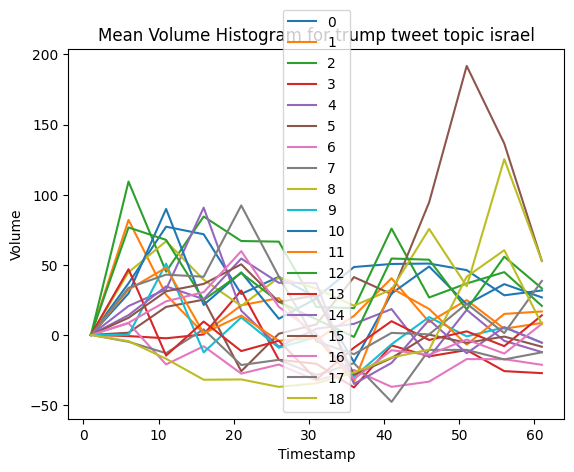

Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'],
      dtype='object')
[1822, 2595, 4141, 4936, 5401, 5913, 6947, 8493]


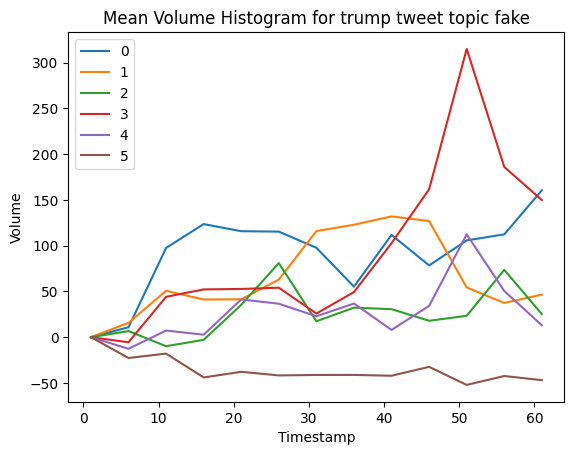

Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'],
      dtype='object')
[68, 1211, 3901, 5282, 7316]


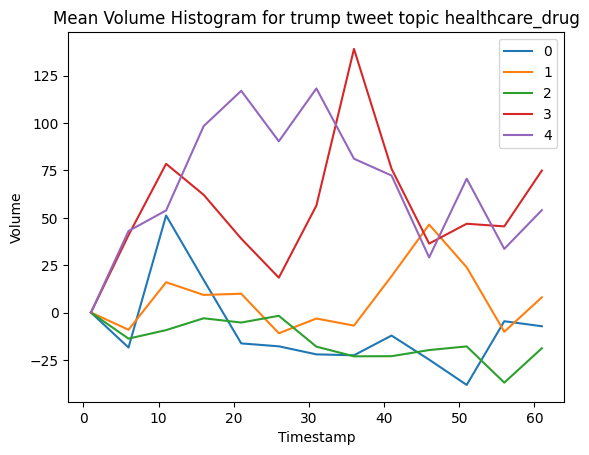

Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'],
      dtype='object')
[510, 1107, 2379, 3870, 5230, 5854, 7982]


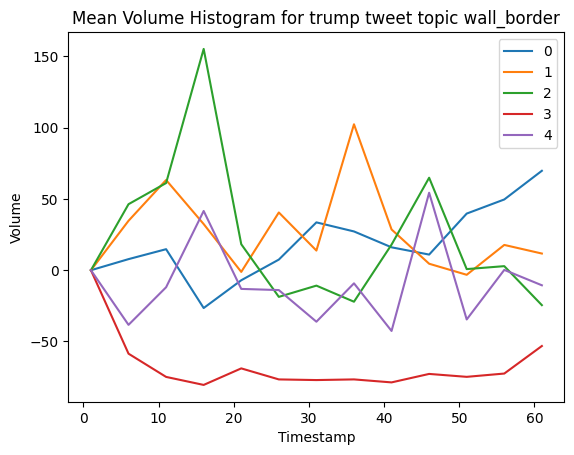

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_aggregated_volume_by_topic(dictionary_file, csv_file):


  for idx in range(len(topic_list)):
    df = pd.read_csv('Trump_election_market_time.csv')
    print(df.columns)
    df.set_index('id', inplace=True)
    rows = df.loc[topic_list[idx]]
    rows['id'] = topic_list[idx]

    rows['date'] = pd.to_datetime(rows['date'], errors='coerce')

    rows = rows.dropna(subset=['date'])

    rows['month'] = rows['date'].dt.month
    month_counts = rows['month'].value_counts().sort_index()
    rows['neartweet'] = rows.apply(lambda row: rows[(rows['date'] < row['date']) & (rows['date'] >= row['date'] - pd.Timedelta(days=14))].shape[0], axis=1)


    month_counts = month_counts.loc[2:11]

    target_array = rows.loc[rows['neartweet'] == 0]['id'].tolist()
    nearby_counts = rows['neartweet'].value_counts().sort_index()
    print(rows.loc[rows['neartweet'] == 0]['id'].tolist())



    for i in  nearby_counts.index:

          # if (i + 2) == 4 or (i+2) == 5:
          #   continue

          df = pd.read_csv(csv_file)
          df_dict = pd.read_csv(dictionary_file)
          first_row = rows.loc[rows['neartweet'] == i]['id'].tolist()


          df_dict = df_dict[df_dict.iloc[:,0].isin(first_row)]
          df.set_index('id', inplace=True)
          ids_to_keep = df_dict.iloc[:, 1].tolist()
          target_rows = df.loc[ids_to_keep]
          df.reset_index(drop = False, inplace = True)
          results = {}
          nearby = i



  # 결과를 CSV 파일로 저장합니다. 전치를 적용하여 열로 데이터를 저장합니다.


          df.set_index('id', inplace=True)
          target_rows = df.loc[first_row]

      # 길이가 41이고 모든 원소가 0인 Series를 생성합니다.
          s = pd.Series([0] * 61)
          a = pd.Series([0] * 13)

  # Series를 DataFrame으로 변환합니다.
          sum_rows = pd.DataFrame(s)
          sum_avg_rows = pd.DataFrame(a)



      # 각 행 주변의 20개 행을 선택하고 volume 데이터를 히스토그램으로 나타냅니다.
          for index, row in target_rows.iterrows():
              start_index = max(0, index)
              end_index = min(len(df), index + 61)
              for i in range(61):
                sum_rows[0][i] = sum_rows[0][i] + (((df.loc[start_index:end_index, 'volume'][start_index + i] / df.loc[start_index:end_index, 'volume'][start_index])*100) - 100)
                if (i+1) % 5 == 0:
                  sum_avg_rows[0][((i+1)/5)] = (sum_rows[0][i] + sum_rows[0][i-1] + sum_rows[0][i-2] + sum_rows[0][i-3] + sum_rows[0][i-4]) / 5


        # sum_rows = (sum_rows + df.loc[start_index:end_index, 'volume'])/2

          num_data = target_rows.shape[0]
          initial_volume = sum_rows[0][0]

          for i in range(61):
            sum_rows[0][i] = sum_rows[0][i] / num_data

          for i in range(13):
            sum_avg_rows[0][i] = sum_avg_rows[0][i]/num_data


      # 히스토그램들의 평균을 계산합니다.

          #plt.plot(sum_rows[0].index - 60, sum_rows[0], color='skyblue')
          plt.plot(((sum_avg_rows[0].index * 5) + 1), sum_avg_rows[0], label = nearby)
          df.reset_index(drop = False, inplace = True)


      # # 가로축에 중심 데이터의 timestamp를 라벨로 표시합니다.
      # center_index = len(mean_histogram) // 2
      # center_timestamp = target_rows.iloc[center_index]['timestamp']
      # plt.xticks([center_timestamp], [center_timestamp.strftime('%Y-%m-%d')])

    plt.title('Mean Volume Histogram for trump tweet topic ' + topic_name[idx])
    plt.xlabel('Timestamp')
    plt.ylabel('Volume')
    plt.legend()
    plt.show()

dictionary_file_path = 'trump_dictionary.csv'
csv_file_path = 'SPY.csv'  # CSV 파일 경로를 제공하세요.

plot_aggregated_volume_by_topic(dictionary_file_path, csv_file_path)

Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'],
      dtype='object')
[139, 6602]
[139, 6602]
[140, 995, 6968, 8347, 8421]
[509, 1093, 4676, 4867, 7146, 8603, 9539]
[511, 1097, 4678, 5075, 5404, 5441, 7148, 8861, 9540]
[516, 876, 1208, 1360, 4413, 4491, 5077, 5099, 5120, 5325, 5461, 5604, 7258, 7565, 8868, 9310, 9413]
[519, 1362, 5613, 7671, 7852, 8901]
[1363, 1565, 3572, 5623, 7672, 7734]
[1572, 1606, 2998, 3573, 5624]
[1575, 1612, 2201, 2202, 2431, 3059, 3574, 5723, 5740, 6044]
[1621, 2328, 2329, 2437, 3063, 3604, 3985, 4124, 5858, 5967, 6057]
[1634, 2184, 2376, 2391, 2438, 3065, 3069, 3282, 3286, 3356, 3380, 3608, 3650, 4126, 5860, 5912, 5972]
[1643, 1975, 2378, 2439, 3097, 3666, 3696, 5974]
[1649, 1977, 1994, 2442, 3112]
[1651, 2059, 2443]
[1657, 1679, 1961, 2067, 2445, 2666, 2802]
[1680, 2543, 2662, 2756, 2772]
[1682, 1813, 1942, 2760]
[1684, 1814]
[1788, 1815]


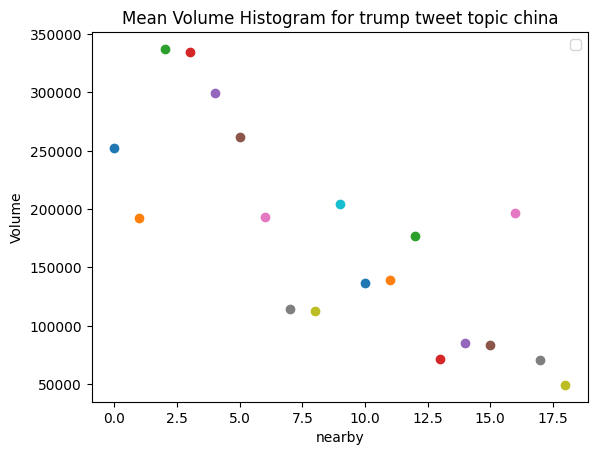

Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'],
      dtype='object')
[167, 1168, 2185, 5590, 7978, 8742]
[167, 1168, 2185, 5590, 7978, 8742]
[590, 620, 1179, 2377, 3108, 3153, 5591, 8751, 9406]
[689, 1182, 1681, 2542, 3154, 3895, 3962, 5593, 8921]
[1183, 2545, 3360, 3903, 4020, 5594]
[1315, 2566, 2622, 3362, 4022, 5595]
[1559, 2623, 4034, 5596]
[2626, 4037, 5597]
[2635, 4048, 5598]
[2637, 4049, 5599]
[2656, 4053, 5600]
[4055, 5601]
[4056, 5602]
[4057, 5603]
[4058, 5605]
[4061, 5606]
[4062, 5607]
[4068, 5608]
[4070, 5610]
[4076, 5676]
[4078, 5693]
[4080, 5694]
[4083, 5695]
[4089, 5696]
[4095, 5697]
[4097, 5699]
[4098, 5727]
[4103, 5889]
[4105, 5947]
[4108]
[4115]
[4116]
[4119]
[4121]
[4122]
[4125]
[4128]
[4134]
[4138]
[4396]
[4403]


[4411]


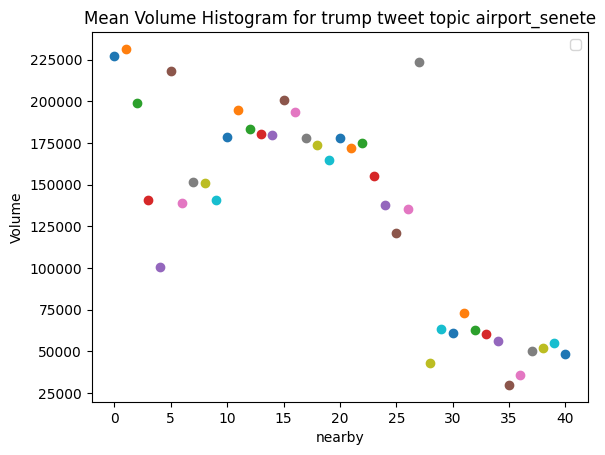

Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'],
      dtype='object')
[770, 4842, 7678]
[770, 4842, 7678]
[772, 2434, 3665, 3843, 5223, 5285, 7888, 8416, 8532]
[868, 2550, 4033, 5326, 7889, 8539]
[871, 2562, 4039, 5403, 7890]
[872, 2399, 2564, 3106, 4040, 5447, 7892]
[874, 1945, 2054, 2570, 3276, 4052, 5472, 5589]
[1039, 2055, 2771, 4059, 5687]
[1040, 2062, 2801, 2996, 4074]
[1085, 1936, 2065, 2804, 4079]
[1092, 1160, 1786, 4090]
[1108, 1165, 1772, 1790, 4104]
[1166, 4112]
[1170, 4117]
[1171, 4139, 4409]
[1172]
[1173]
[1174]
[1175]
[1176]
[1177]
[1178]
[1180]
[1181]
[1184]
[1185]
[1186]
[1187]
[1188]
[1189, 1316]
[1207, 1318]
[1209, 1321, 1442, 1562]
[1213, 1382, 1573]
[1574, 1619]
[1578]


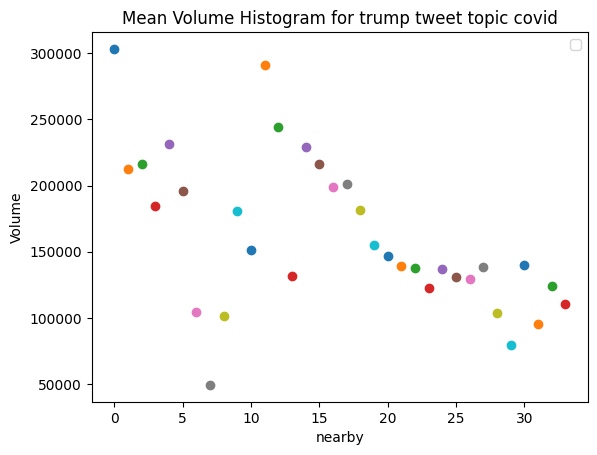

Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'],
      dtype='object')
[84, 4913, 8100, 8101]
[84, 4913, 8100, 8101]
[358, 559, 4914, 5406, 5865, 6045, 6998]
[589, 878, 2547, 3984, 4977, 6129, 6337, 6550, 7147, 8317, 9862]
[926, 1036, 1622, 1783, 2436, 2591, 4109, 5074, 7150, 8617, 8666]
[927, 1095, 1560, 1623, 1816, 1980, 2360, 2620, 3111, 3543, 3571, 4113, 5080, 7152, 8629, 8912, 9463]
[1096, 1823, 2051, 2775, 3068, 3096, 3289, 4144, 5106, 7237, 7425, 8935, 9069, 9500]
[1114, 1824, 2157, 2776, 4145, 7584, 9087]
[1210, 2158, 4149]
[4151, 4275]
[4287]
[4292]
[4293]
[4294]
[4296]
[4299, 4315]
[4321]
[4333]


[4360]
[4500]


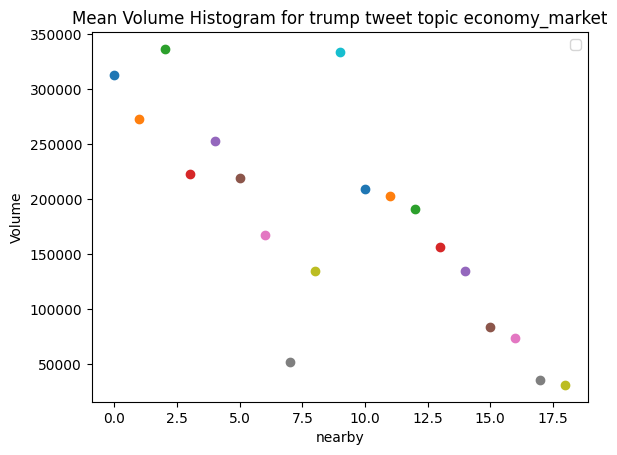

Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'],
      dtype='object')
[88]
[88]
[355, 2657, 3057, 4863, 5399, 6892, 8628]
[489, 3061, 4872, 5231, 5402, 6411, 6940, 7207, 8331, 8667, 9126, 9389]
[512, 1938, 1981, 1995, 3062, 4593, 5484, 5884, 7336, 9313, 9397]
[513, 965, 1072, 1113, 1939, 2066, 2380, 3070, 3266, 3881, 3955, 5485, 5886, 6156, 7371, 7676, 7893, 9412]
[517, 560, 877, 1119, 1660, 2186, 3280, 3988, 5486, 5915, 7427, 7904, 9416]
[688, 920, 1144, 1369, 1580, 3281, 3698, 4030, 5975, 9542]
[1287, 1288, 1611, 3283, 3699, 4051]
[3363, 4085]
[3542, 4102]
[4137, 4307]
[4308]


[4309]


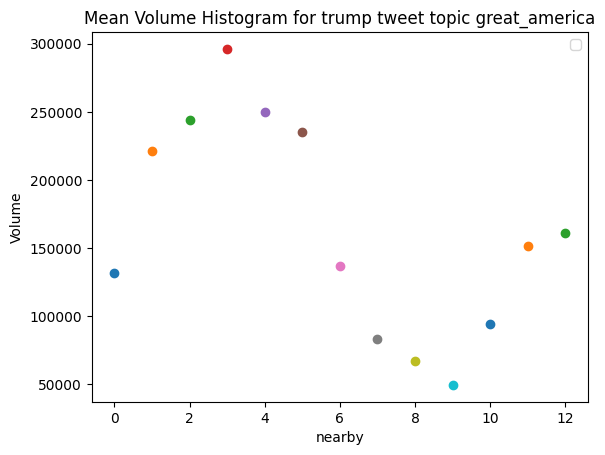

Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'],
      dtype='object')
[145, 622, 1554, 3284, 3996, 3997, 5609, 6090, 7141, 8424, 9377]
[145, 622, 1554, 3284, 3996, 3997, 5609, 6090, 7141, 8424, 9377]
[146, 623, 1635, 1976, 2072, 5682, 6091, 7318, 9390]
[148, 624, 1659, 2177, 6113, 7320]
[625, 2382, 6114, 7321]
[626, 6118, 7322]
[731, 6121, 7323]
[6150, 7324]
[6153, 7325]
[6161, 7327]
[7328]
[7329]
[7330]
[7331]
[7333]
[7428]
[7429]
[7430]
[7431]
[7673, 7853]


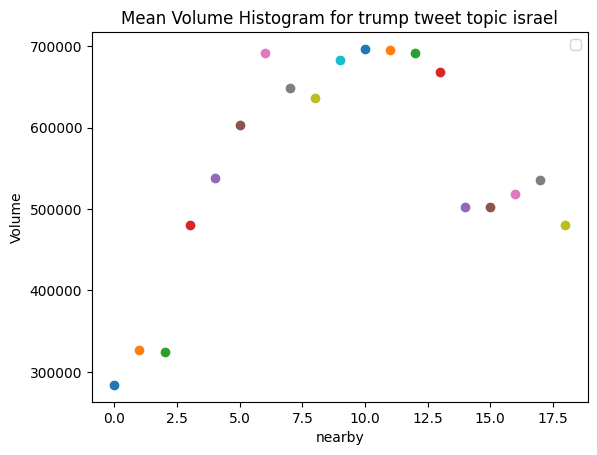

Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'],
      dtype='object')
[1822, 2595, 4141, 4936, 5401, 5913, 6947, 8493]
[1822, 2595, 4141, 4936, 5401, 5913, 6947, 8493]
[1973, 2820, 3305, 4142, 5917, 7567, 8540]
[4143, 5982, 7639, 7812, 8758]
[4147, 6083, 8864]
[4148, 6292, 9067]
[4418, 9086, 9124]


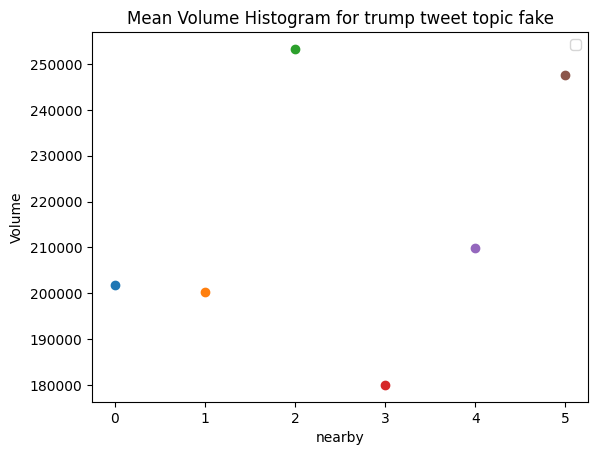

Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'],
      dtype='object')
[68, 1211, 3901, 5282, 7316]
[68, 1211, 3901, 5282, 7316]
[1361, 3902, 5657, 6086, 6392, 7566, 8327, 8668]
[4072, 5658, 6414, 7569, 8670]
[5692, 5726, 7692, 8771]


[5887, 7887, 8815, 9088]


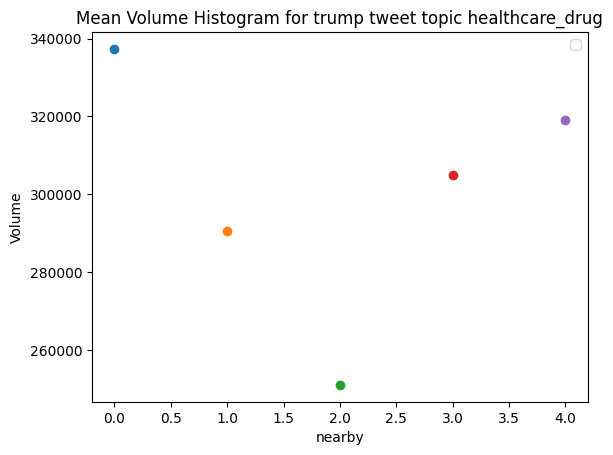

Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'],
      dtype='object')
[510, 1107, 2379, 3870, 5230, 5854, 7982]
[510, 1107, 2379, 3870, 5230, 5854, 7982]
[514, 1169, 2759, 3041, 4401]
[518, 1212, 3110]
[1368]
[1581, 1641]


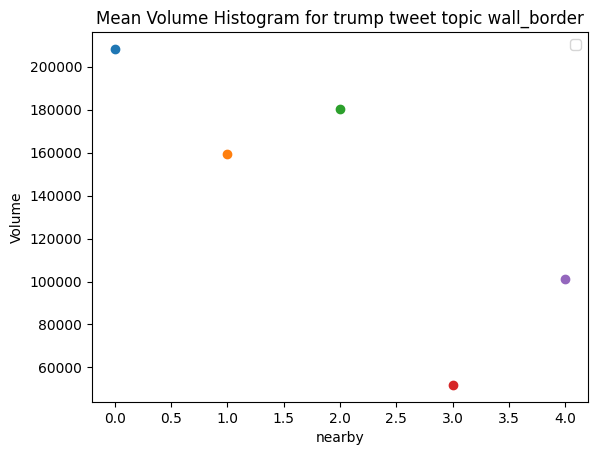

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_aggregated_volume_by_topic(dictionary_file, csv_file):


  for idx in range(len(topic_list)):
    df = pd.read_csv('Trump_election_market_time.csv')
    print(df.columns)
    df.set_index('id', inplace=True)
    rows = df.loc[topic_list[idx]]
    rows['id'] = topic_list[idx]

    rows['date'] = pd.to_datetime(rows['date'], errors='coerce')

    rows = rows.dropna(subset=['date'])

    rows['month'] = rows['date'].dt.month
    month_counts = rows['month'].value_counts().sort_index()
    rows['neartweet'] = rows.apply(lambda row: rows[(rows['date'] < row['date']) & (rows['date'] >= row['date'] - pd.Timedelta(days=14))].shape[0], axis=1)


    month_counts = month_counts.loc[2:11]

    target_array = rows.loc[rows['neartweet'] == 0]['id'].tolist()
    nearby_counts = rows['neartweet'].value_counts().sort_index()
    print(rows.loc[rows['neartweet'] == 0]['id'].tolist())



    for i in  nearby_counts.index:

          # if (i + 2) == 4 or (i+2) == 5:
          #   continue

          df = pd.read_csv(csv_file)
          df_dict = pd.read_csv(dictionary_file)
          first_row = rows.loc[rows['neartweet'] == i]['id'].tolist()

          print(first_row)


          df_dict = df_dict[df_dict.iloc[:,0].isin(first_row)]
          df.set_index('id', inplace=True)
          ids_to_keep = df_dict.iloc[:, 1].tolist()
          target_rows = df.loc[ids_to_keep]
          df.reset_index(drop = False, inplace = True)
          results = {}
          nearby = i



  # 결과를 CSV 파일로 저장합니다. 전치를 적용하여 열로 데이터를 저장합니다.


          df.set_index('id', inplace=True)
          target_rows = df.loc[first_row]

      # 길이가 41이고 모든 원소가 0인 Series를 생성합니다.
          s = pd.Series([0] * 61)
          a = pd.Series([0] * 13)
          avg10 = 0

  # Series를 DataFrame으로 변환합니다.
          sum_rows = pd.DataFrame(s)
          sum_avg_rows = pd.DataFrame(a)





      # 각 행 주변의 20개 행을 선택하고 volume 데이터를 히스토그램으로 나타냅니다.
          for index, row in target_rows.iterrows():
              start_index = max(0, index)
              end_index = min(len(df), index + 61)
              avg10 = avg10 + (np.sum(df.loc[start_index:start_index + 10, 'volume']) / 10)
              for i in range(61):
                sum_rows[0][i] = sum_rows[0][i] + (((df.loc[start_index:end_index, 'volume'][start_index + i] / df.loc[start_index:end_index, 'volume'][start_index])*100) - 100)
                if (i+1) % 5 == 0:
                  sum_avg_rows[0][((i+1)/5)] = (sum_rows[0][i] + sum_rows[0][i-1] + sum_rows[0][i-2] + sum_rows[0][i-3] + sum_rows[0][i-4]) / 5


        # sum_rows = (sum_rows + df.loc[start_index:end_index, 'volume'])/2

          num_data = target_rows.shape[0]
          initial_volume = sum_rows[0][0]
          avg10 = avg10 / num_data

          for i in range(61):
            sum_rows[0][i] = sum_rows[0][i] / num_data

          for i in range(13):
            sum_avg_rows[0][i] = sum_avg_rows[0][i]/num_data


      # 히스토그램들의 평균을 계산합니다.

          #plt.plot(sum_rows[0].index - 60, sum_rows[0], color='skyblue')
          plt.scatter(nearby, avg10)
          #plt.plot(((sum_avg_rows[0].index * 5) + 1), sum_avg_rows[0], label = nearby)
          df.reset_index(drop = False, inplace = True)


      # # 가로축에 중심 데이터의 timestamp를 라벨로 표시합니다.
      # center_index = len(mean_histogram) // 2
      # center_timestamp = target_rows.iloc[center_index]['timestamp']
      # plt.xticks([center_timestamp], [center_timestamp.strftime('%Y-%m-%d')])

    plt.title('Mean Volume Histogram for trump tweet topic ' + topic_name[idx])
    plt.xlabel('nearby')
    plt.ylabel('Volume')
    plt.legend()
    plt.show()

dictionary_file_path = 'trump_dictionary.csv'
csv_file_path = 'SPY.csv'  # CSV 파일 경로를 제공하세요.

plot_aggregated_volume_by_topic(dictionary_file_path, csv_file_path)

Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'],
      dtype='object')
[139, 6602]
[139, 6602]
[140, 995, 6968, 8347, 8421]
[509, 1093, 4676, 4867, 7146, 8603, 9539]
[511, 1097, 4678, 5075, 5404, 5441, 7148, 8861, 9540]
[516, 876, 1208, 1360, 4413, 4491, 5077, 5099, 5120, 5325, 5461, 5604, 7258, 7565, 8868, 9310, 9413]
[519, 1362, 5613, 7671, 7852, 8901]
[1363, 1565, 3572, 5623, 7672, 7734]
[1572, 1606, 2998, 3573, 5624]
[1575, 1612, 2201, 2202, 2431, 3059, 3574, 5723, 5740, 6044]
[1621, 2328, 2329, 2437, 3063, 3604, 3985, 4124, 5858, 5967, 6057]
[1634, 2184, 2376, 2391, 2438, 3065, 3069, 3282, 3286, 3356, 3380, 3608, 3650, 4126, 5860, 5912, 5972]
[1643, 1975, 2378, 2439, 3097, 3666, 3696, 5974]
[1649, 1977, 1994, 2442, 3112]
[1651, 2059, 2443]
[1657, 1679, 1961, 2067, 2445, 2666, 2802]
[1680, 2543, 2662, 2756, 2772]
[1682, 1813, 1942, 2760]
[1684, 1814]
[1788, 1815]


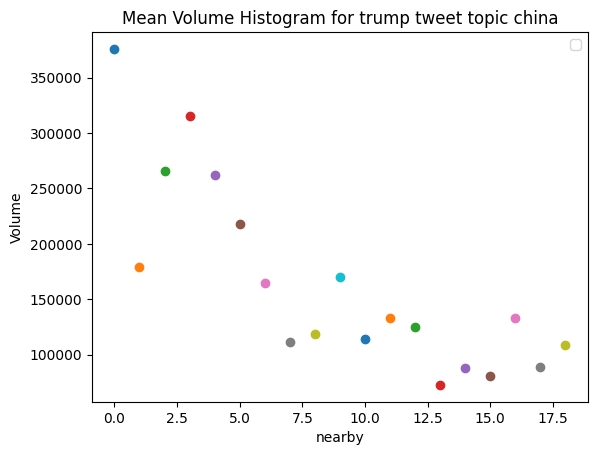

Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'],
      dtype='object')
[167, 1168, 2185, 5590, 7978, 8742]
[167, 1168, 2185, 5590, 7978, 8742]
[590, 620, 1179, 2377, 3108, 3153, 5591, 8751, 9406]
[689, 1182, 1681, 2542, 3154, 3895, 3962, 5593, 8921]
[1183, 2545, 3360, 3903, 4020, 5594]
[1315, 2566, 2622, 3362, 4022, 5595]
[1559, 2623, 4034, 5596]
[2626, 4037, 5597]
[2635, 4048, 5598]
[2637, 4049, 5599]
[2656, 4053, 5600]
[4055, 5601]
[4056, 5602]
[4057, 5603]
[4058, 5605]
[4061, 5606]
[4062, 5607]
[4068, 5608]
[4070, 5610]
[4076, 5676]
[4078, 5693]
[4080, 5694]
[4083, 5695]
[4089, 5696]
[4095, 5697]
[4097, 5699]
[4098, 5727]
[4103, 5889]
[4105, 5947]
[4108]
[4115]
[4116]
[4119]
[4121]
[4122]
[4125]
[4128]
[4134]
[4138]
[4396]
[4403]
[4411]


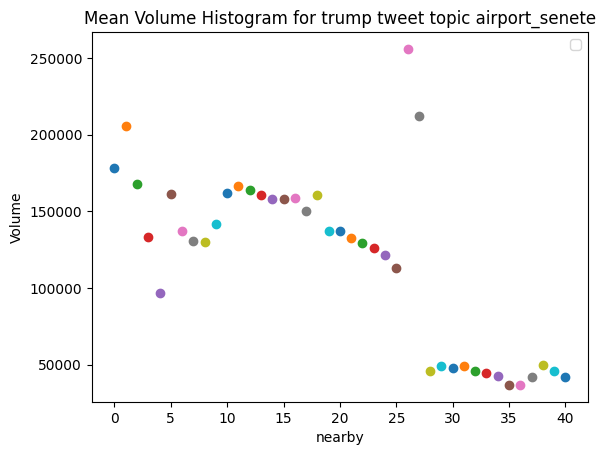

Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'],
      dtype='object')
[770, 4842, 7678]
[770, 4842, 7678]
[772, 2434, 3665, 3843, 5223, 5285, 7888, 8416, 8532]
[868, 2550, 4033, 5326, 7889, 8539]
[871, 2562, 4039, 5403, 7890]
[872, 2399, 2564, 3106, 4040, 5447, 7892]
[874, 1945, 2054, 2570, 3276, 4052, 5472, 5589]
[1039, 2055, 2771, 4059, 5687]
[1040, 2062, 2801, 2996, 4074]
[1085, 1936, 2065, 2804, 4079]
[1092, 1160, 1786, 4090]
[1108, 1165, 1772, 1790, 4104]
[1166, 4112]
[1170, 4117]
[1171, 4139, 4409]
[1172]
[1173]
[1174]
[1175]
[1176]
[1177]
[1178]
[1180]
[1181]
[1184]
[1185]
[1186]
[1187]
[1188]
[1189, 1316]
[1207, 1318]
[1209, 1321, 1442, 1562]
[1213, 1382, 1573]
[1574, 1619]
[1578]


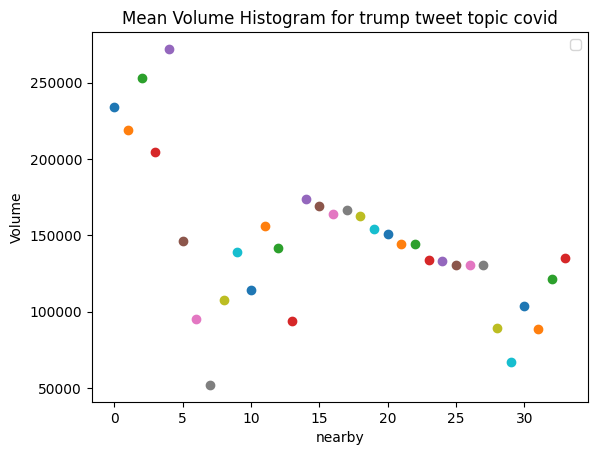

Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'],
      dtype='object')
[84, 4913, 8100, 8101]
[84, 4913, 8100, 8101]
[358, 559, 4914, 5406, 5865, 6045, 6998]
[589, 878, 2547, 3984, 4977, 6129, 6337, 6550, 7147, 8317, 9862]
[926, 1036, 1622, 1783, 2436, 2591, 4109, 5074, 7150, 8617, 8666]
[927, 1095, 1560, 1623, 1816, 1980, 2360, 2620, 3111, 3543, 3571, 4113, 5080, 7152, 8629, 8912, 9463]
[1096, 1823, 2051, 2775, 3068, 3096, 3289, 4144, 5106, 7237, 7425, 8935, 9069, 9500]
[1114, 1824, 2157, 2776, 4145, 7584, 9087]
[1210, 2158, 4149]
[4151, 4275]
[4287]
[4292]
[4293]
[4294]
[4296]
[4299, 4315]
[4321]
[4333]


[4360]
[4500]


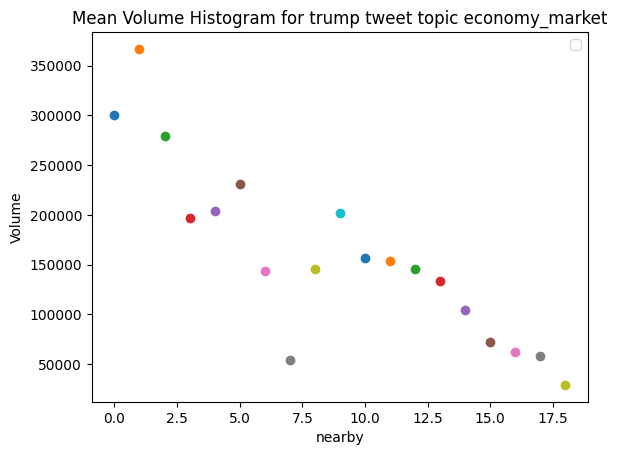

Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'],
      dtype='object')
[88]
[88]
[355, 2657, 3057, 4863, 5399, 6892, 8628]
[489, 3061, 4872, 5231, 5402, 6411, 6940, 7207, 8331, 8667, 9126, 9389]
[512, 1938, 1981, 1995, 3062, 4593, 5484, 5884, 7336, 9313, 9397]
[513, 965, 1072, 1113, 1939, 2066, 2380, 3070, 3266, 3881, 3955, 5485, 5886, 6156, 7371, 7676, 7893, 9412]
[517, 560, 877, 1119, 1660, 2186, 3280, 3988, 5486, 5915, 7427, 7904, 9416]
[688, 920, 1144, 1369, 1580, 3281, 3698, 4030, 5975, 9542]
[1287, 1288, 1611, 3283, 3699, 4051]
[3363, 4085]
[3542, 4102]
[4137, 4307]
[4308]


[4309]


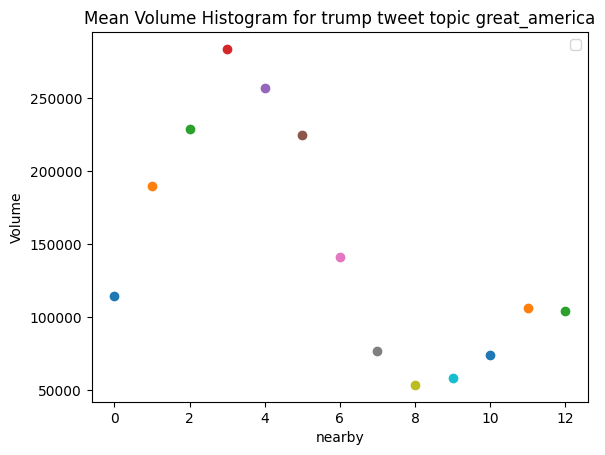

Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'],
      dtype='object')
[145, 622, 1554, 3284, 3996, 3997, 5609, 6090, 7141, 8424, 9377]
[145, 622, 1554, 3284, 3996, 3997, 5609, 6090, 7141, 8424, 9377]
[146, 623, 1635, 1976, 2072, 5682, 6091, 7318, 9390]
[148, 624, 1659, 2177, 6113, 7320]
[625, 2382, 6114, 7321]
[626, 6118, 7322]
[731, 6121, 7323]
[6150, 7324]
[6153, 7325]
[6161, 7327]
[7328]
[7329]
[7330]
[7331]
[7333]
[7428]
[7429]
[7430]
[7431]
[7673, 7853]


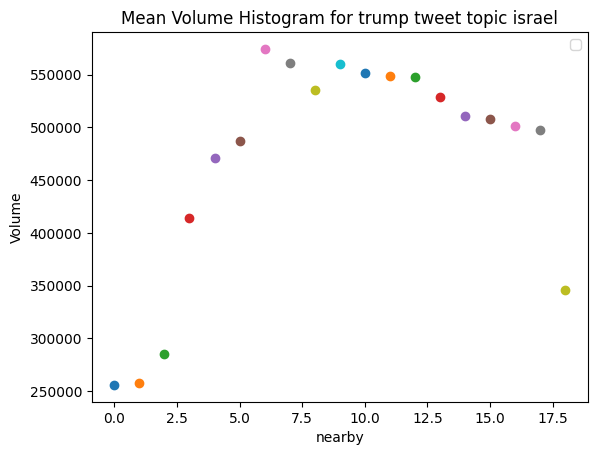

Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'],
      dtype='object')
[1822, 2595, 4141, 4936, 5401, 5913, 6947, 8493]
[1822, 2595, 4141, 4936, 5401, 5913, 6947, 8493]
[1973, 2820, 3305, 4142, 5917, 7567, 8540]
[4143, 5982, 7639, 7812, 8758]
[4147, 6083, 8864]
[4148, 6292, 9067]


[4418, 9086, 9124]


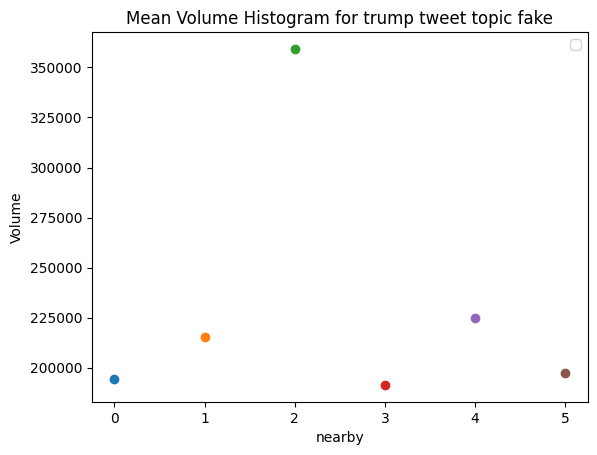

Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'],
      dtype='object')
[68, 1211, 3901, 5282, 7316]
[68, 1211, 3901, 5282, 7316]
[1361, 3902, 5657, 6086, 6392, 7566, 8327, 8668]
[4072, 5658, 6414, 7569, 8670]
[5692, 5726, 7692, 8771]
[5887, 7887, 8815, 9088]


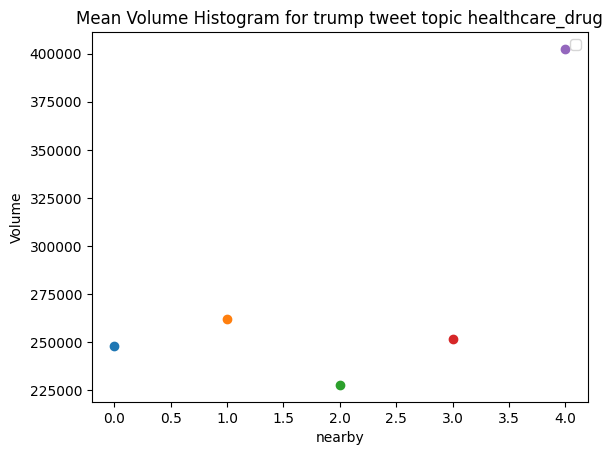

Index(['id', 'text', 'isRetweet', 'isDeleted', 'device', 'favorites',
       'retweets', 'date', 'isFlagged'],
      dtype='object')
[510, 1107, 2379, 3870, 5230, 5854, 7982]
[510, 1107, 2379, 3870, 5230, 5854, 7982]
[514, 1169, 2759, 3041, 4401]
[518, 1212, 3110]
[1368]


[1581, 1641]


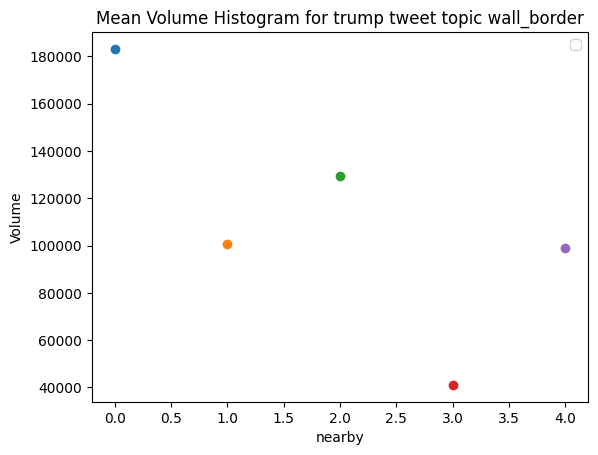

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_aggregated_volume_by_topic(dictionary_file, csv_file):


  for idx in range(len(topic_list)):
    df = pd.read_csv('Trump_election_market_time.csv')
    print(df.columns)
    df.set_index('id', inplace=True)
    rows = df.loc[topic_list[idx]]
    rows['id'] = topic_list[idx]

    rows['date'] = pd.to_datetime(rows['date'], errors='coerce')

    rows = rows.dropna(subset=['date'])

    rows['month'] = rows['date'].dt.month
    month_counts = rows['month'].value_counts().sort_index()
    rows['neartweet'] = rows.apply(lambda row: rows[(rows['date'] < row['date']) & (rows['date'] >= row['date'] - pd.Timedelta(days=14))].shape[0], axis=1)


    month_counts = month_counts.loc[2:11]

    target_array = rows.loc[rows['neartweet'] == 0]['id'].tolist()
    nearby_counts = rows['neartweet'].value_counts().sort_index()
    print(rows.loc[rows['neartweet'] == 0]['id'].tolist())



    for i in  nearby_counts.index:

          # if (i + 2) == 4 or (i+2) == 5:
          #   continue

          df = pd.read_csv(csv_file)
          df_dict = pd.read_csv(dictionary_file)
          first_row = rows.loc[rows['neartweet'] == i]['id'].tolist()

          print(first_row)


          df_dict = df_dict[df_dict.iloc[:,0].isin(first_row)]
          df.set_index('id', inplace=True)
          ids_to_keep = df_dict.iloc[:, 1].tolist()
          target_rows = df.loc[ids_to_keep]
          df.reset_index(drop = False, inplace = True)
          results = {}
          nearby = i



  # 결과를 CSV 파일로 저장합니다. 전치를 적용하여 열로 데이터를 저장합니다.


          df.set_index('id', inplace=True)
          target_rows = df.loc[first_row]

      # 길이가 41이고 모든 원소가 0인 Series를 생성합니다.
          s = pd.Series([0] * 61)
          a = pd.Series([0] * 13)
          avg30 = 0

  # Series를 DataFrame으로 변환합니다.
          sum_rows = pd.DataFrame(s)
          sum_avg_rows = pd.DataFrame(a)





      # 각 행 주변의 20개 행을 선택하고 volume 데이터를 히스토그램으로 나타냅니다.
          for index, row in target_rows.iterrows():
              start_index = max(0, index)
              end_index = min(len(df), index + 61)
              avg30 = avg30 + (np.sum(df.loc[start_index:start_index + 30, 'volume']) / 30)
              for i in range(61):
                sum_rows[0][i] = sum_rows[0][i] + (((df.loc[start_index:end_index, 'volume'][start_index + i] / df.loc[start_index:end_index, 'volume'][start_index])*100) - 100)
                if (i+1) % 5 == 0:
                  sum_avg_rows[0][((i+1)/5)] = (sum_rows[0][i] + sum_rows[0][i-1] + sum_rows[0][i-2] + sum_rows[0][i-3] + sum_rows[0][i-4]) / 5


        # sum_rows = (sum_rows + df.loc[start_index:end_index, 'volume'])/2

          num_data = target_rows.shape[0]
          initial_volume = sum_rows[0][0]
          avg30 = avg30 / num_data

          for i in range(61):
            sum_rows[0][i] = sum_rows[0][i] / num_data

          for i in range(13):
            sum_avg_rows[0][i] = sum_avg_rows[0][i]/num_data


      # 히스토그램들의 평균을 계산합니다.

          #plt.plot(sum_rows[0].index - 60, sum_rows[0], color='skyblue')
          plt.scatter(nearby, avg30)
          #plt.plot(((sum_avg_rows[0].index * 5) + 1), sum_avg_rows[0], label = nearby)
          df.reset_index(drop = False, inplace = True)


      # # 가로축에 중심 데이터의 timestamp를 라벨로 표시합니다.
      # center_index = len(mean_histogram) // 2
      # center_timestamp = target_rows.iloc[center_index]['timestamp']
      # plt.xticks([center_timestamp], [center_timestamp.strftime('%Y-%m-%d')])

    plt.title('Mean Volume Histogram for trump tweet topic ' + topic_name[idx])
    plt.xlabel('nearby')
    plt.ylabel('Volume')
    plt.legend()
    plt.show()

dictionary_file_path = 'trump_dictionary.csv'
csv_file_path = 'SPY.csv'  # CSV 파일 경로를 제공하세요.

plot_aggregated_volume_by_topic(dictionary_file_path, csv_file_path)

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

def near_tweets_volume_by_topic(dictionary_file, csv_file, minute, etf):


  for idx in range(len(topic_list)):
    df = pd.read_csv('Trump_election_market_time.csv')

    df.set_index('id', inplace=True)
    rows = df.loc[topic_list[idx]]
    rows['id'] = topic_list[idx]

    rows['date'] = pd.to_datetime(rows['date'], errors='coerce')

    rows = rows.dropna(subset=['date'])

    rows['month'] = rows['date'].dt.month
    month_counts = rows['month'].value_counts().sort_index()
    rows['neartweet'] = rows.apply(lambda row: rows[(rows['date'] < row['date']) & (rows['date'] >= row['date'] - pd.Timedelta(days=14))].shape[0], axis=1)


    month_counts = month_counts.loc[2:11]

    target_array = rows.loc[rows['neartweet'] == 0]['id'].tolist()
    nearby_counts = rows['neartweet'].value_counts().sort_index()

    a = nearby_counts.shape[0]
    b = pd.Series([0] * nearby_counts.shape[0])

    avg_volumes = pd.DataFrame(b)

    for i in  nearby_counts.index:

          # if (i + 2) == 4 or (i+2) == 5:
          #   continue

          df = pd.read_csv(csv_file)
          df_dict = pd.read_csv(dictionary_file)
          first_row = rows.loc[rows['neartweet'] == i]['id'].tolist()

          df_dict = df_dict[df_dict.iloc[:,0].isin(first_row)]
          df.set_index('id', inplace=True)
          ids_to_keep = df_dict.iloc[:, 1].tolist()
          target_rows = df.loc[ids_to_keep]
          df.reset_index(drop = False, inplace = True)
          results = {}
          nearby = i



  # 결과를 CSV 파일로 저장합니다. 전치를 적용하여 열로 데이터를 저장합니다.


          df.set_index('id', inplace=True)
          target_rows = df.loc[first_row]

          avg10 = 0


      # 각 행 주변의 20개 행을 선택하고 volume 데이터를 히스토그램으로 나타냅니다.
          for index, row in target_rows.iterrows():
              start_index = max(0, index)
              end_index = min(len(df), index + 61)
              avg10 = avg10 + (np.sum(df.loc[start_index:start_index + minute, 'volume']) / minute)


        # sum_rows = (sum_rows + df.loc[start_index:end_index, 'volume'])/2

          num_data = target_rows.shape[0]
          avg10 = avg10 / num_data
          avg_volumes[i] = avg10


      # 히스토그램들의 평균을 계산합니다.

          #plt.plot(sum_rows[0].index - 60, sum_rows[0], color='skyblue')

          #plt.plot(((sum_avg_rows[0].index * 5) + 1), sum_avg_rows[0], label = nearby)
          df.reset_index(drop = False, inplace = True)


    # 가로축에 중심 데이터의 timestamp를 라벨로 표시합니다.
    plt.scatter(nearby_counts.index, avg_volumes.loc[0], color='skyblue')

    slope, intercept, r_value, p_value, std_err = linregress(nearby_counts.index, avg_volumes.loc[0])


    m, b = np.polyfit(nearby_counts.index, avg_volumes.loc[0], 1)

    trendline = m*(nearby_counts.index) + b
    plt.plot(nearby_counts.index, slope*(nearby_counts.index) + intercept, color='red', label='Trend line')

    distances = np.abs(avg_volumes.loc[0] - trendline)
    mean_distance = np.mean(distances)

    plt.text(0.05, max(avg_volumes.loc[0]), f'avg Distance: {mean_distance:.2f}', fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.05, min(avg_volumes.loc[0]) , f'slope: {slope:.2f}', fontsize=9, bbox=dict(facecolor='white', alpha=0.5))

    plt.title(str(minute) + 'min mean ' + etf + ' Volume after topic ' + topic_name[idx])
    plt.xlabel('nearby')
    plt.ylabel('Volume')
    plt.legend()
    plt.show()
    plt.savefig(str(minute) + '_' + topic_name[idx] + '_' + etf + '.png', format='png')
    print('Correlation coefficient: ' + str(np.corrcoef(nearby_counts.index, avg_volumes.loc[0])[0, 1]))
    print('p-value: ' + str(p_value))

csvs = ['XLV.csv', 'XLB.csv', 'XLC.csv', 'XLE.csv', 'XLF.csv', 'XLI.csv', 'XLK.csv', 'XLP.csv', 'XLRE.csv', 'XLU.csv']
dictionary_file_path = 'trump_dictionary.csv'
csv_file_path = 'SPY.csv'  # CSV 파일 경로를 제공하세요.

near_tweets_volume_by_topic(dictionary_file_path, csv_file_path, 10, 'SPY')
near_tweets_volume_by_topic(dictionary_file_path, csv_file_path, 20, 'SPY')
near_tweets_volume_by_topic(dictionary_file_path, csv_file_path, 30, 'SPY')
near_tweets_volume_by_topic(dictionary_file_path, csv_file_path, 60, 'SPY')
near_tweets_volume_by_topic(dictionary_file_path, csv_file_path, 90, 'SPY')
near_tweets_volume_by_topic(dictionary_file_path, csv_file_path, 120, 'SPY')
near_tweets_volume_by_topic(dictionary_file_path, csv_file_path, 150, 'SPY')
near_tweets_volume_by_topic(dictionary_file_path, csv_file_path, 180, 'SPY')

for i in range(len(csvs)):
  near_tweets_volume_by_topic(dictionary_file_path, csvs[i], 10, csvs[i][0:3])
  near_tweets_volume_by_topic(dictionary_file_path, csvs[i], 20, csvs[i][0:3])
  near_tweets_volume_by_topic(dictionary_file_path, csvs[i], 30, csvs[i][0:3])
  near_tweets_volume_by_topic(dictionary_file_path, csvs[i], 60, csvs[i][0:3])
  near_tweets_volume_by_topic(dictionary_file_path, csvs[i], 90, csvs[i][0:3])
  near_tweets_volume_by_topic(dictionary_file_path, csvs[i], 120, csvs[i][0:3])
  near_tweets_volume_by_topic(dictionary_file_path, csvs[i], 150, csvs[i][0:3])
  near_tweets_volume_by_topic(dictionary_file_path, csvs[i], 180, csvs[i][0:3])

Output hidden; open in https://colab.research.google.com to view.